In [1]:
models = ['clip', 'albef', 'vilt']
metrics = ['standard_pearson']

In [2]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cdist
from scipy.stats import ttest_rel
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import torch

from fsk.dataprep.utils import (
    get_concepts_info, get_feature_idx_map, get_fsk, 
    get_fsk_features, get_fsk_synsets, get_synsets_ids
)

from fsk.similarity.sem_distances import get_mcrae_features

from IPython.display import Image
#pd.set_option('display.max_rows', None)

In [3]:
project_path = Path('/Users/m_vilas/projects/fsk-multimodal')
res_path = project_path / 'results/'
image_path = project_path / 'dataset/things/object_images'

In [4]:
# Synsets and Concepts data
s_ids, concepts = get_synsets_ids(project_path / 'dataset')
mcrae_concepts = concepts['mcrae']
things_concepts = concepts['things']
synsets = get_fsk_synsets(project_path / 'dataset') # real order of synsets
concepts_info = get_concepts_info(project_path / 'dataset')

# Features data
fsk = get_fsk(project_path / 'dataset')
ft_idx = get_feature_idx_map(project_path / 'dataset/annotations')
ft_idx = {val: key for key, val in ft_idx.items()}
fsk_ft = get_fsk_features(project_path / 'dataset')
mcrae_ft = get_mcrae_features(project_path, list(s_ids.keys()), mcrae_concepts, None)
sem_ft = mcrae_ft.values

# Concept Match

__Q:__ Do V+L accurately detect the concept depicted in the image?

In [5]:
top_k = [1, 5, 10]

c_preds = {}
for m in models:
    m_preds = []
    c_match_path = res_path / m / 'concept_match'
    for s, s_imgs in s_ids.items():
        correct_val = synsets.index(s)
        for img in s_imgs:
            val = [s, img]
            i_pred = torch.load(c_match_path / f'{img}.pt', map_location=torch.device('cpu'))
            top_indices = i_pred.topk(15)[1]
            val.append([synsets[i] for i in top_indices])
            for t in top_k:
                val.append(correct_val in top_indices[:t])
            m_preds.append(val)
    c_preds[m] = pd.DataFrame(m_preds, columns=['synset', 'image', 'preds', 'top1', 'top5', 'top10'])
    print(m)
    print(f"Top1 accuracy: {c_preds[m]['top1'].mean()}")
    print(f"Top5 accuracy: {c_preds[m]['top5'].mean()}")
    print(f"Top10 accuracy: {c_preds[m]['top10'].mean()}")
    print("\n")


clip
Top1 accuracy: 0.34517045454545453
Top5 accuracy: 0.42410714285714285
Top10 accuracy: 0.4472402597402597


albef
Top1 accuracy: 0.336038961038961
Top5 accuracy: 0.4224837662337662
Top10 accuracy: 0.43973214285714285


vilt
Top1 accuracy: 0.237012987012987
Top5 accuracy: 0.3612012987012987
Top10 accuracy: 0.4028003246753247




An example:

In [6]:
s_ex = 'accordion-n-01'

In [7]:
pd.set_option('display.width', 1500)

all_c_preds = (
    pd.concat(c_preds)
    .reset_index(level=1, drop=True)
    .reset_index()
    .rename(columns={'index':'model'})
)

all_c_preds.loc[all_c_preds['synset']==s_ex][['model', 'image', 'preds']]

model          image                                              preds
0      clip  accordion_01b  [accordion-n-01, harmonica-n-01, hamster-n-01,...
1      clip  accordion_07s  [accordion-n-01, harmonica-n-01, hamster-n-01,...
2      clip  accordion_11s  [accordion-n-01, hamster-n-01, bag-n-01, buckl...
3      clip  accordion_10s  [accordion-n-01, hamster-n-01, harmonica-n-01,...
4      clip  accordion_06s  [accordion-n-01, pheasant-n-01, key-n-01, hams...
5      clip  accordion_13s  [accordion-n-01, pheasant-n-01, hamster-n-01, ...
6      clip  accordion_05s  [accordion-n-01, harmonica-n-01, clam-n-01, ph...
7      clip  accordion_09s  [accordion-n-01, bag-n-01, hamster-n-01, grass...
8      clip  accordion_08s  [accordion-n-01, pheasant-n-01, hamster-n-01, ...
9      clip  accordion_04s  [accordion-n-01, banjo-n-01, harmonica-n-01, r...
10     clip  accordion_12s  [accordion-n-01, harmonica-n-01, pheasant-n-01...
11     clip  accordion_03s  [accordion-n-01, pheasant-n-01, rope-n-01, har...
12     clip  accordion_02s  [accordion-n-01, typewriter-n-01, pheasant-n-0...
13     clip  accordion_14s  [accordion-n-01, bagpipe-n-01, harmonica-n-01,...
4928  albef  accordion_01b  [accordion-n-01, robe-n-01, crab-n-01, cheetah...
4929  albef  accordion_07s  [accordion-n-01, robe-n-01, bomb-n-01, jacket-...
4930  albef  accordion_11s  [accordion-n-01, skunk-n-04, envelope-n-01, ro...
4931  albef  accordion_10s  [accordion-n-01, robe-n-01, book-n-01, envelop...
4932  albef  accordion_06s  [accordion-n-01, key-n-01, robe-n-01, banner-n...
4933  albef  accordion_13s  [accordion-n-01, key-n-01, curtain-n-01, crab-...
4934  albef  accordion_05s  [accordion-n-01, robe-n-01, pearl-n-01, jacket...
4935  albef  accordion_09s  [accordion-n-01, oven-n-01, hamster-n-01, dagg...
4936  albef  accordion_08s  [accordion-n-01, envelope-n-01, pliers-n-01, w...
4937  albef  accordion_04s  [accordion-n-01, box-n-01, rope-n-01, curtain-...
4938  albef  accordion_12s  [accordion-n-01, crab-n-01, robe-n-01, envelop...
4939  albef  accordion_03s  [accordion-n-01, beehive-n-02, rope-n-01, bann...
4940  albef  accordion_02s  [accordion-n-01, envelope-n-01, crab-n-01, oni...
4941  albef  accordion_14s  [accordion-n-01, robe-n-01, belt-n-02, pearl-n...
9856   vilt  accordion_01b  [harmonica-n-01, accordion-n-01, clam-n-01, pl...
9857   vilt  accordion_07s  [accordion-n-01, bagpipe-n-01, harmonica-n-01,...
9858   vilt  accordion_11s  [accordion-n-01, bag-n-01, drill-n-01, buckle-...
9859   vilt  accordion_10s  [accordion-n-01, harmonica-n-01, catfish-n-03,...
9860   vilt  accordion_06s  [harmonica-n-01, trombone-n-01, clam-n-01, typ...
9861   vilt  accordion_13s  [accordion-n-01, harmonica-n-01, bagpipe-n-01,...
9862   vilt  accordion_05s  [accordion-n-01, harmonica-n-01, bagpipe-n-01,...
9863   vilt  accordion_09s  [belt-n-02, accordion-n-01, bag-n-01, buckle-n...
9864   vilt  accordion_08s  [accordion-n-01, bagpipe-n-01, hamster-n-01, c...
9865   vilt  accordion_04s  [belt-n-02, buckle-n-01, bagpipe-n-01, banjo-n...
9866   vilt  accordion_12s  [platypus-n-01, bagpipe-n-01, grasshopper-n-01...
9867   vilt  accordion_03s  [buckle-n-01, harmonica-n-01, banjo-n-01, clam...
9868   vilt  accordion_02s  [accordion-n-01, cage-n-01, harp-n-01, rug-n-0...
9869   vilt  accordion_14s  [harmonica-n-01, banjo-n-01, accordion-n-01, c...

# Feature match

__Q:__ Do V+L accurately detect the features depicted in the image?

In [8]:
f_preds = {}
for m in models:
    m_preds = []
    f_match_path = res_path / m / 'feature_match'
    for s, s_imgs in s_ids.items():
        s_info = fsk.loc[fsk['synsets'] == s]
        n_features = len(s_info)
        top_k_i = [n_features, (n_features * 2)]
        for img in s_imgs:
            i_pred = torch.load(f_match_path / f'{img}.pt', map_location=torch.device('cpu'))
            top_indices = i_pred.topk(n_features * 2)[1]
            for _, f in s_info.iterrows():
                val = [s, img, f['features'], f['features_type']]
                correct_val = int(f['features_idx'])
                val.append([ft_idx[int(i)] for i in top_indices])
                for t in top_k_i:
                    val.append(correct_val in top_indices[:t])
                val.append(i_pred[correct_val].detach().numpy())
                m_preds.append(val)
    f_preds[m] = pd.DataFrame(
        m_preds, 
        columns=['synset', 'image', 'feature', 'feature_type', 'preds', 'top1', 'top2', 'pred_val']
    )
    print(m)
    print(f"Top1 accuracy: {f_preds[m]['top1'].mean()}")
    print(f"Top2 accuracy: {f_preds[m]['top2'].mean()}")
    print("\n")

clip
Top1 accuracy: 0.21163178203928906
Top2 accuracy: 0.29766428905519177


albef
Top1 accuracy: 0.1541013797942002
Top2 accuracy: 0.2236172825070159


vilt
Top1 accuracy: 0.12624239943872778
Top2 accuracy: 0.19282039289055192




__Q:__ Is this accuracy dependent on feature type?

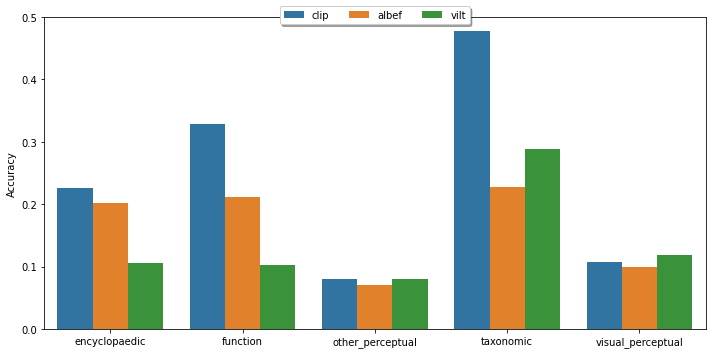

In [9]:
mean_by_f = []
for m in models:
    m_data = f_preds[m].groupby('feature_type').mean().reset_index()
    m_data['model'] = m
    mean_by_f.append(m_data)
mean_by_f = pd.concat(mean_by_f)
mean_by_f = mean_by_f.drop('top2', axis=1)

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(
    x='feature_type', y='top1', hue='model', 
    data=mean_by_f, hue_order=['clip', 'albef', 'vilt']
)
ax.set(ylim=(0, 0.5))
ax.set(xlabel=None, ylabel='Accuracy')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=6, fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

In [10]:
for m in models:
    m_preds = []
    f_match_path = res_path / m / 'feature_match'
    for s, s_imgs in s_ids.items():
        s_info = fsk.loc[fsk['synsets'] == s]
        n_features = len(s_info)
        for img in s_imgs:
            i_pred = torch.load(f_match_path / f'{img}.pt', map_location=torch.device('cpu'))
            top_indices = i_pred.topk(n_features)[1]
            m_preds.append(
                [s, img, [ft_idx[int(i)] for i in top_indices], s_info['features'].tolist()]
            )
    m_preds = pd.DataFrame(m_preds, columns=['synset', 'image', 'features', 'preds'])
    m_preds.to_csv(res_path / 'pred_inspection' / f'{m}_feature_preds.csv')
    

# Inspecting feature predictions

In [11]:
f_accs = {}
for m in models:
    f_acc = f_preds[m].groupby(['feature']).mean()
    f_accs[m] = (
        pd.concat([f_acc, f_preds['clip']['feature'].value_counts().rename('counts')], axis=1)
    )
pd.concat(f_accs).sort_values(by='counts', axis=0, ascending=False)[:30]

top1      top2  counts
vilt  made_of_metal      0.069648  0.142962    1364
clip  made_of_metal      0.000000  0.005865    1364
albef made_of_metal      0.001466  0.006598    1364
      is_small           0.066231  0.160448    1072
clip  is_small           0.004664  0.025187    1072
vilt  is_small           0.029851  0.082090    1072
albef an_animal          0.068618  0.187689     991
vilt  an_animal          0.135217  0.255298     991
clip  an_animal          0.442987  0.733602     991
albef is_large           0.002312  0.011561     865
vilt  is_large           0.030058  0.058960     865
clip  is_large           0.002312  0.016185     865
vilt  is_long            0.009816  0.017178     815
clip  is_long            0.006135  0.015951     815
albef is_long            0.046626  0.104294     815
      is_round           0.010638  0.013298     752
clip  is_round           0.003989  0.007979     752
vilt  is_round           0.083777  0.150266     752
clip  is_edible          0.025316  0.061885     711
vilt  is_edible          0.016878  0.090014     711
albef is_edible          0.042194  0.109705     711
vilt  made_of_wood       0.079826  0.137881     689
albef made_of_wood       0.007257  0.021771     689
clip  made_of_wood       0.018868  0.039187     689
vilt  made_of_plastic    0.159734  0.227953     601
albef made_of_plastic    0.021631  0.034942     601
clip  made_of_plastic    0.008319  0.011647     601
      different_colours  0.027972  0.052448     572
vilt  different_colours  0.050699  0.115385     572
albef different_colours  0.052448  0.106643     572

__Observation__: Variability across models.

- _To-Do_: quantify variability

####  Display most and least matched images for a feature

In [46]:
model = 'clip'
#model = 'albef'
#model = 'vilt'

In [47]:
#f_probe = 'has_a_tail' # visual perceptual
#f_probe = 'an_animal' # taxonomic
#f_probe = 'is_edible'  # function
#f_probe = 'is_loud'  # other_peceptual
f_probe = 'found_in_kitchens' # encyclopaedic

In [48]:
f_model = f_preds[model]
test = f_model.loc[f_model['feature']==f_probe].sort_values(by='pred_val', axis=0, ascending=False)

__Observations__: 
- An animal in clip, is it the background? (Also evident in "is edible")
- An animal in albef, there is also a visual pattern?
- An animal in vilt, related to classes?

In [49]:
test[:10]

synset           image            feature   feature_type                                              preds   top1   top2    pred_val
22308  dishwasher-n-01  dishwasher_12n  found_in_kitchens  encyclopaedic  [used_for_storing_dishes, used_for_washing_dis...  False  False  0.27942538
35590       ladle-n-01       ladle_08s  found_in_kitchens  encyclopaedic  [has_a_concave_end/ladle, a_spoon, has_a_long_...  False  False  0.27682513
17249   corkscrew-n-01   corkscrew_07s  found_in_kitchens  encyclopaedic  [used_by_butchers, used_by_hanging, used_for_h...  False  False  0.27467188
59336    strainer-n-01    strainer_12s  found_in_kitchens  encyclopaedic  [used_for_washing_dishes, used_for_boiling_wat...  False  False  0.27373713
37850   microwave-n-02   microwave_11s  found_in_kitchens  encyclopaedic  [has_an_oven, an_oven, an_appliance, found_in_...   True   True  0.27266708
17189   corkscrew-n-01   corkscrew_02s  found_in_kitchens  encyclopaedic  [used_for_opening_wine_bottles, used_for_holdi...  False  False  0.27164233
62740       tongs-n-01       tongs_01s  found_in_kitchens  encyclopaedic  [used_for_shaving, has_a_pointed_end, used_for...  False  False   0.2709203
62390     toaster-n-02     toaster_02s  found_in_kitchens  encyclopaedic  [an_appliance, used_for_serving_food, used_for...  False  False   0.2705375
42260         pan-n-01         pan_16s  found_in_kitchens  encyclopaedic  [used_for_cooking, worn_by_cooks, used_for_coo...  False  False  0.26693726
59310    strainer-n-01    strainer_08s  found_in_kitchens  encyclopaedic  [used_for_boiling_water, used_for_washing_dish...  False  False  0.26684934

In [50]:
test[-10:]

synset        image            feature   feature_type                                              preds   top1   top2    pred_val
10690  cabinet-n-01  cabinet_03s  found_in_kitchens  encyclopaedic  [made_of_drywall, has_sliding_doors, used_on_w...  False  False  0.19183064
46513    plate-n-04    plate_08s  found_in_kitchens  encyclopaedic  [part_of_a_set_of_dishes, used_at_weddings, pa...  False  False  0.19182503
22072     dish-n-01     dish_08s  found_in_kitchens  encyclopaedic  [part_of_a_set_of_dishes, used_at_dinners, par...  False  False  0.19081256
22272     dish-n-01     dish_07s  found_in_kitchens  encyclopaedic  [part_of_a_set_of_dishes, used_for_storing_dis...  False  False  0.19026057
10590  cabinet-n-01  cabinet_07s  found_in_kitchens  encyclopaedic  [has_sliding_doors, used_for_dividing_rooms, u...  False  False  0.18924844
60757    table-n-02    table_06s  found_in_kitchens  encyclopaedic  [used_with_tables, has_a_bench, used_with_chai...  False  False  0.18740398
55758     sink-n-01     sink_11s  found_in_kitchens  encyclopaedic  [a_basin, a_tap, sinks, has_water_controls, is...  False  False  0.18595175
46573    plate-n-04    plate_05s  found_in_kitchens  encyclopaedic  [part_of_a_set_of_dishes, a_basin, a_dish, wor...  False  False  0.18442497
10580  cabinet-n-01  cabinet_06s  found_in_kitchens  encyclopaedic  [used_for_dividing_rooms, used_for_decoration,...  False  False   0.1831007
60867    table-n-02    table_05s  found_in_kitchens  encyclopaedic  [used_with_tables, used_for_picnics, used_with...  False  False  0.18096487

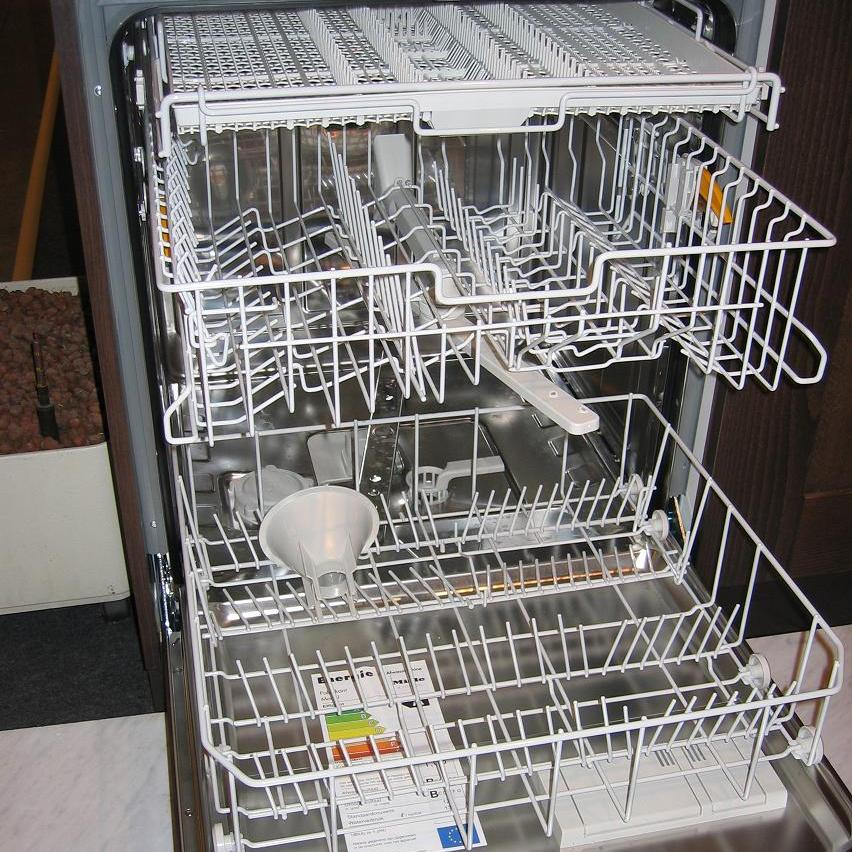

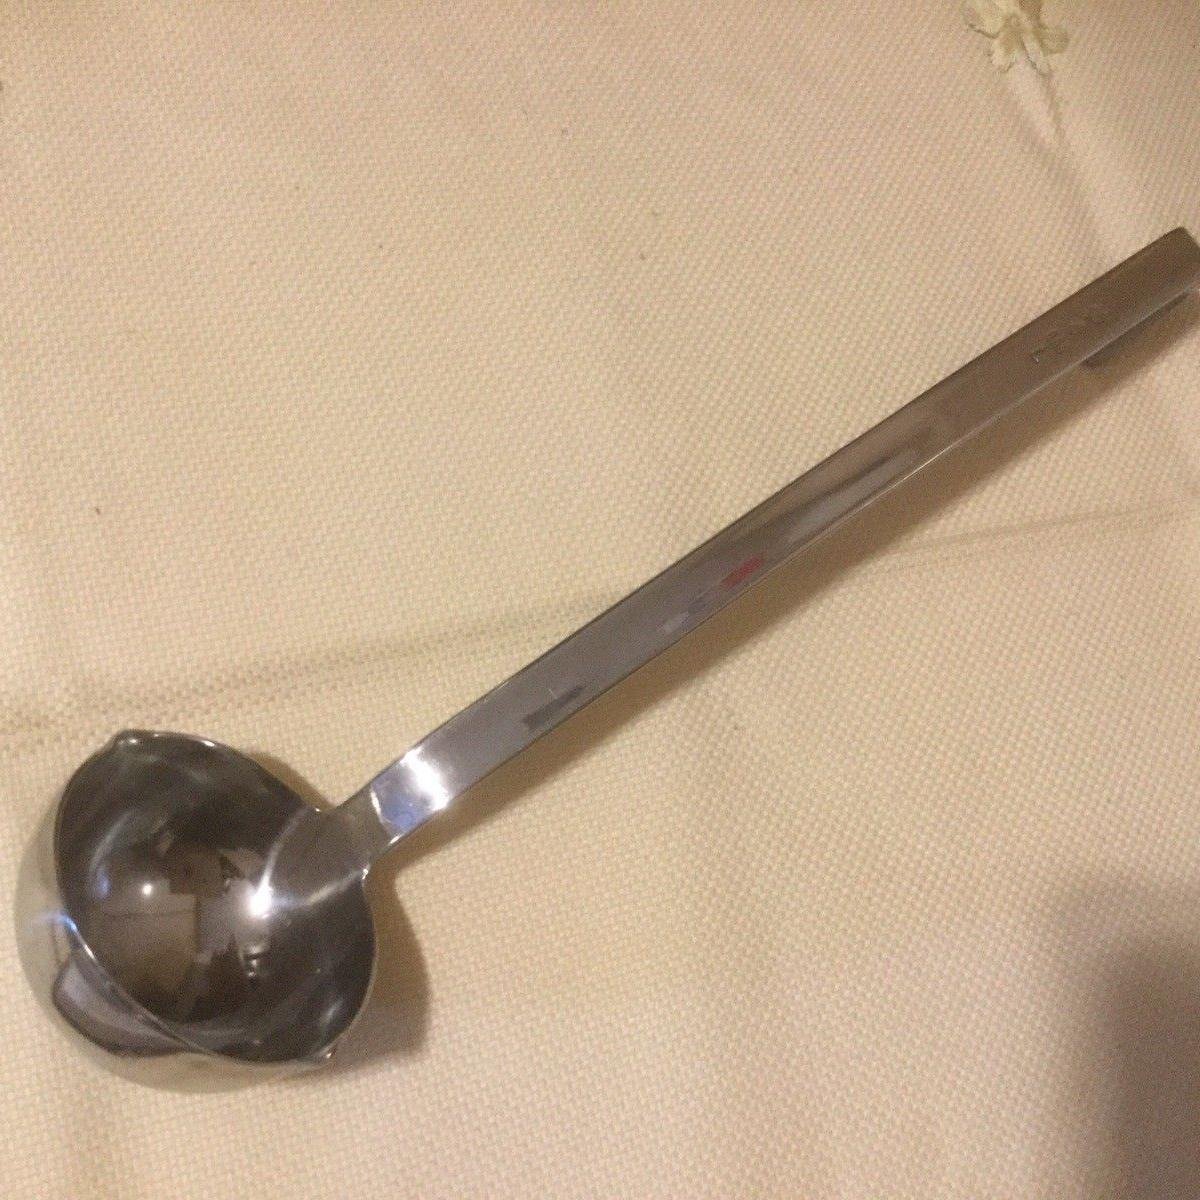

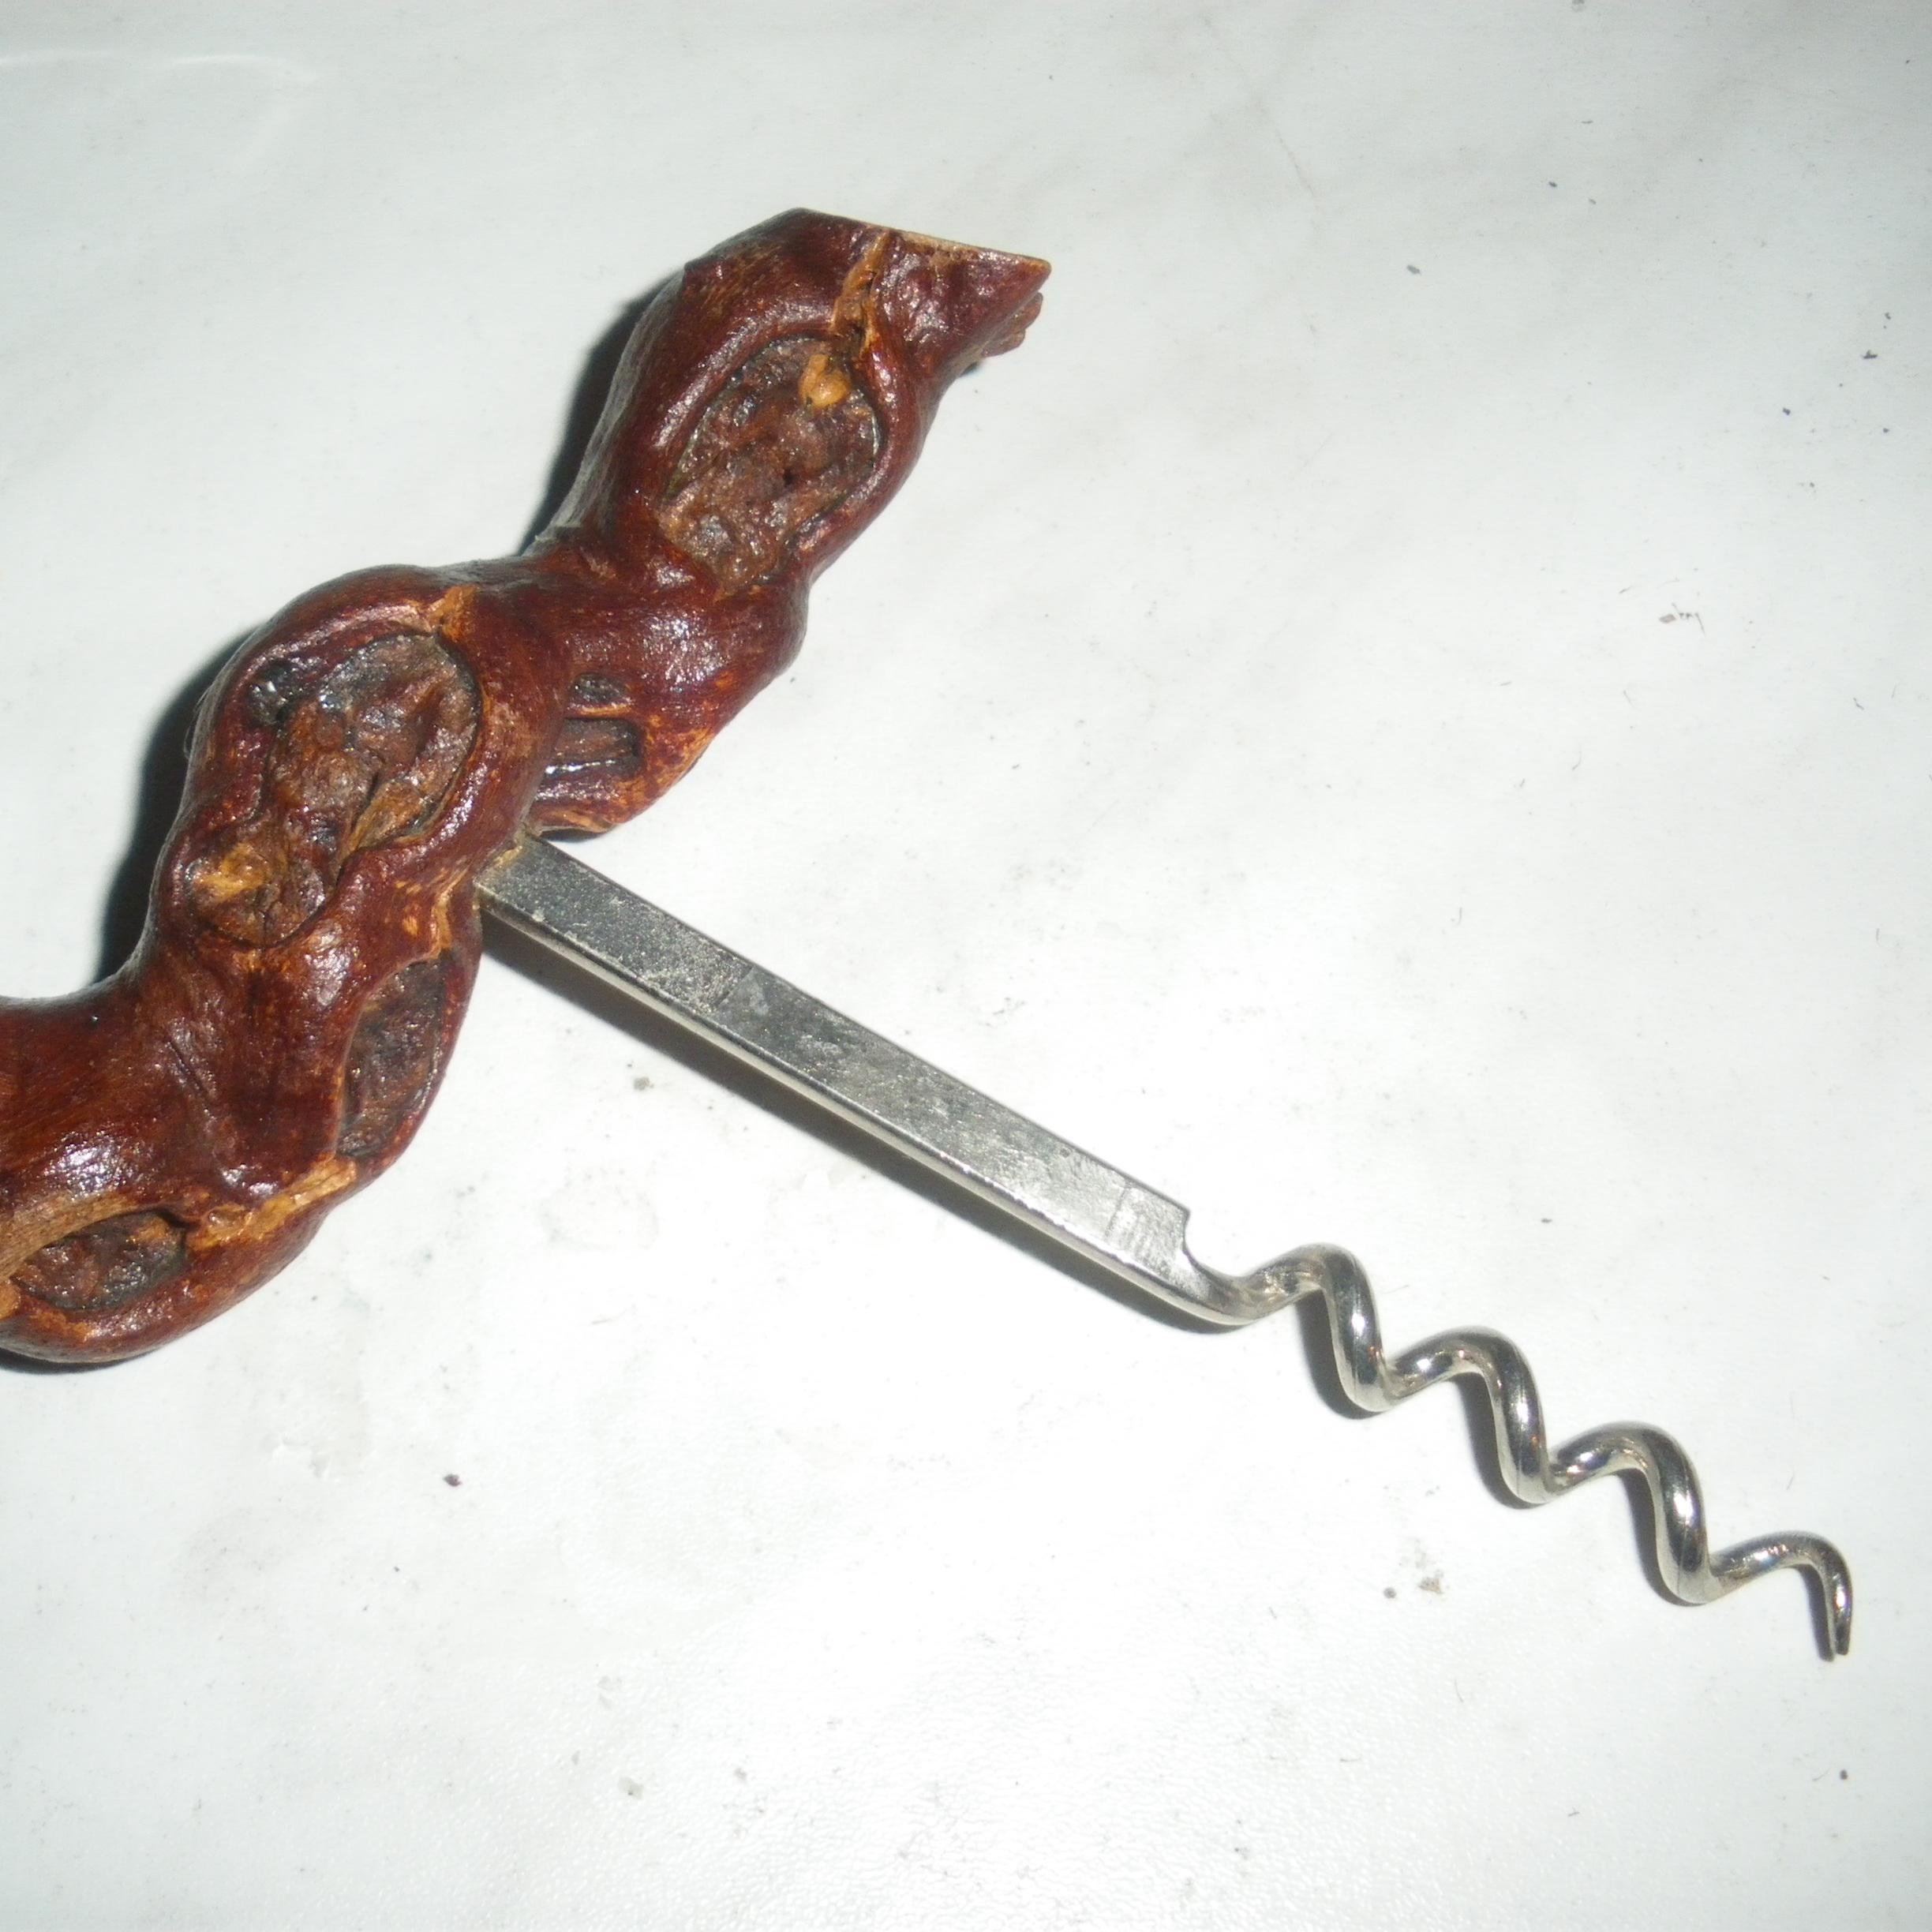

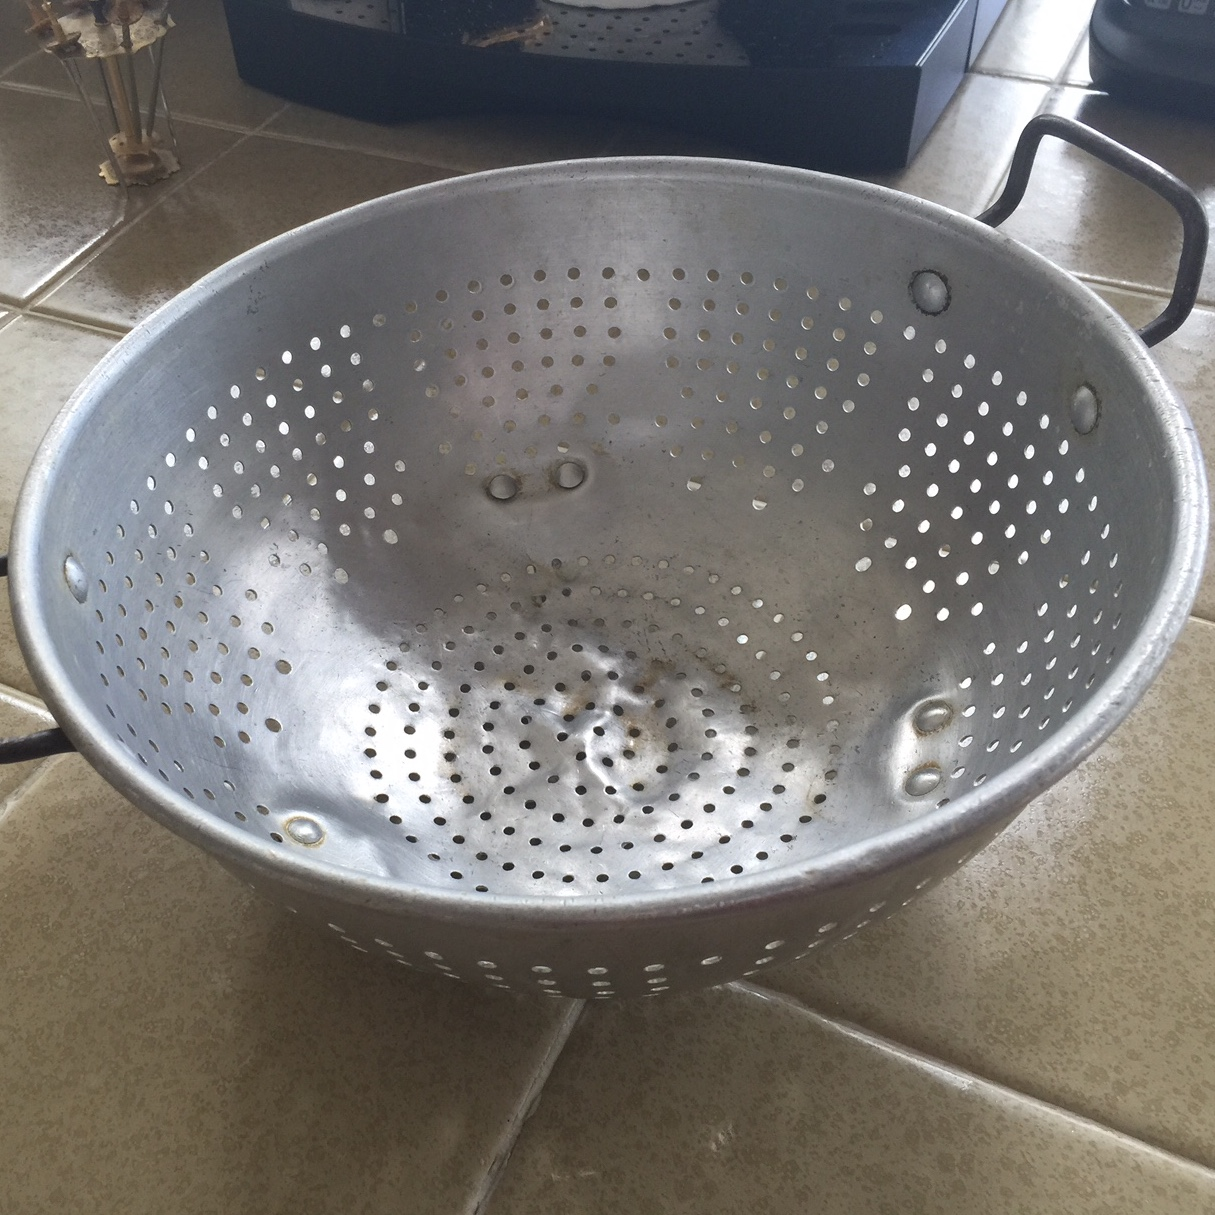

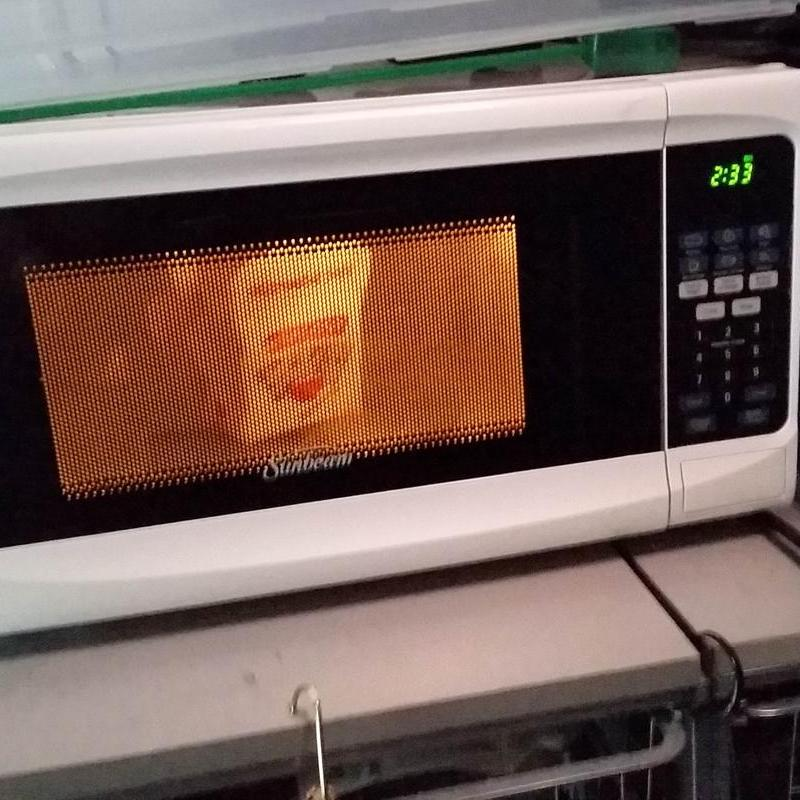

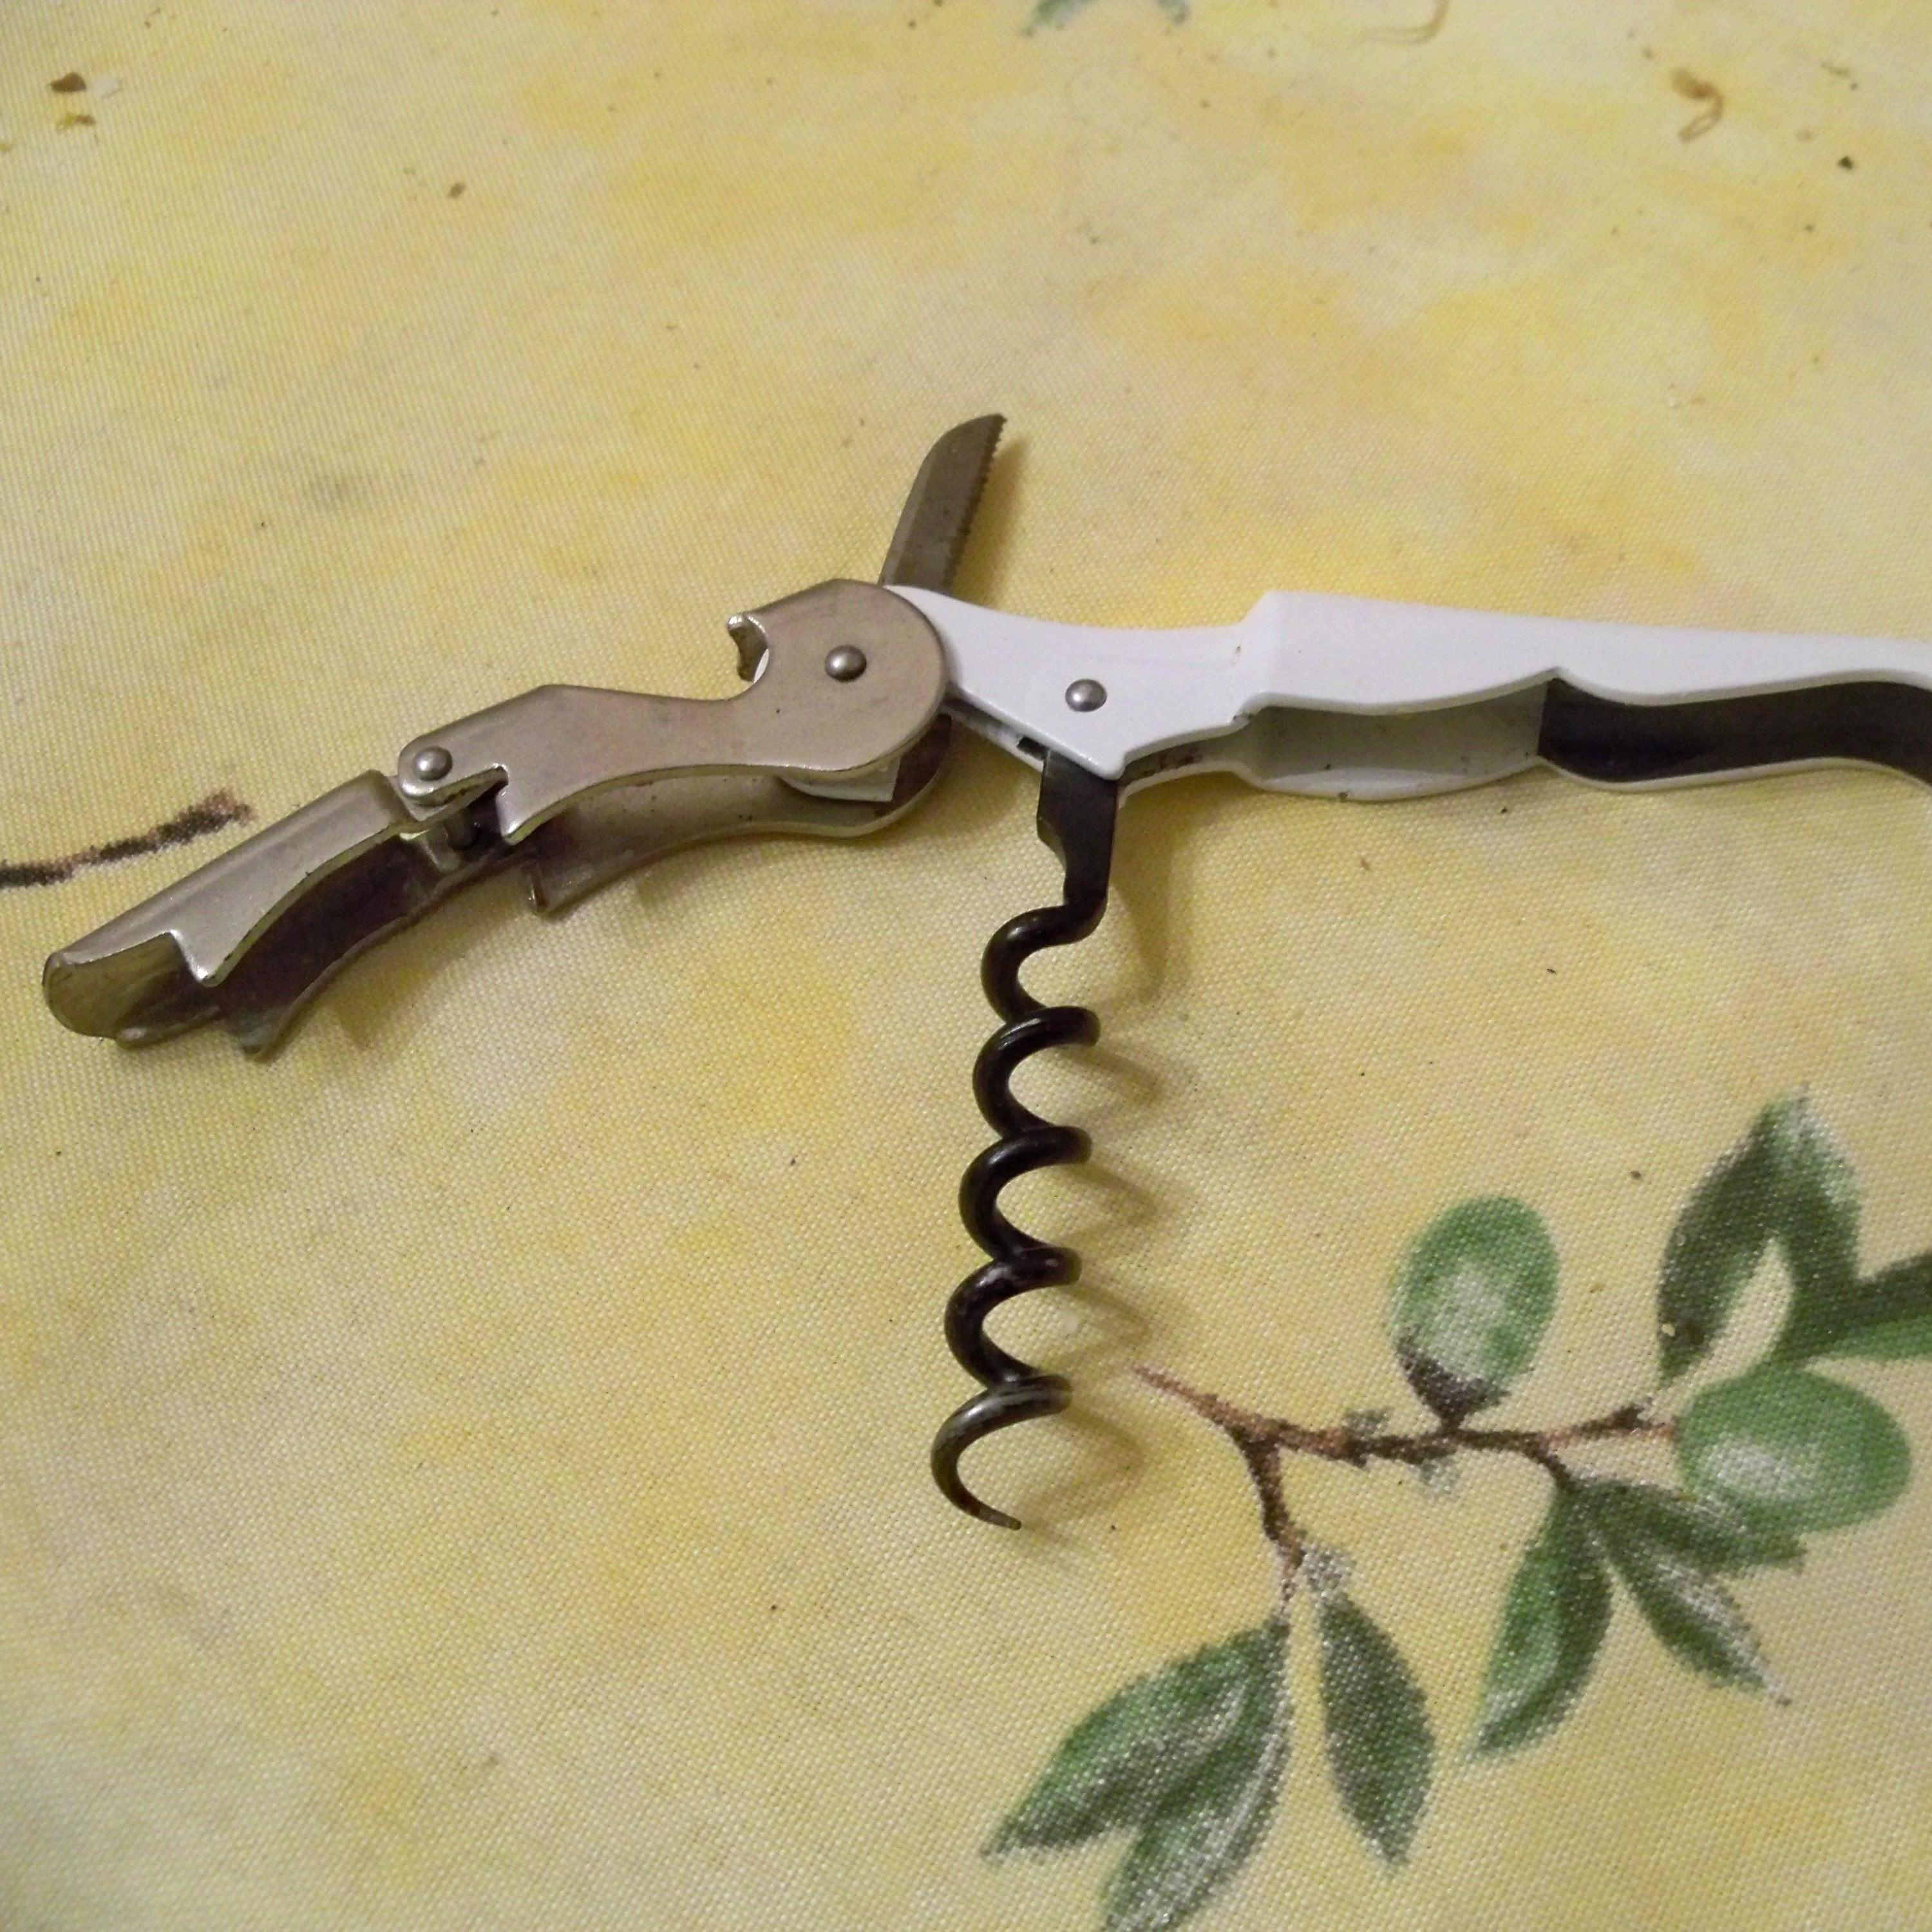

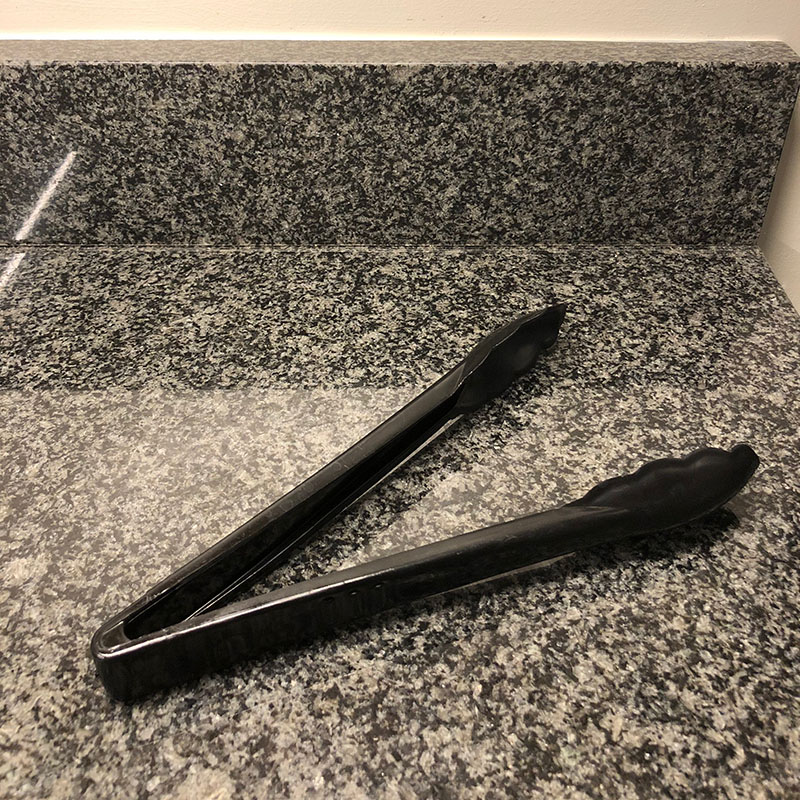

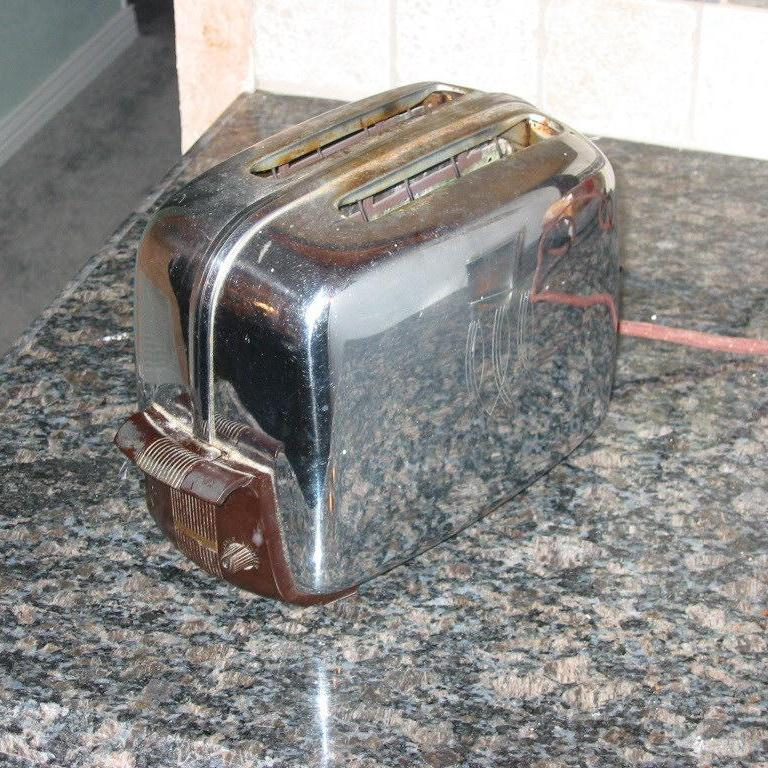

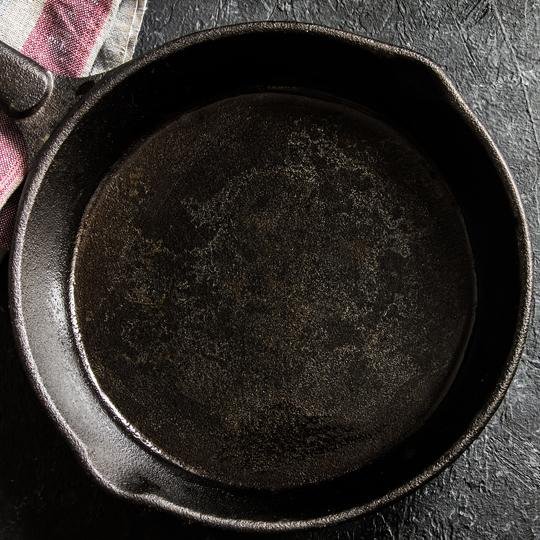

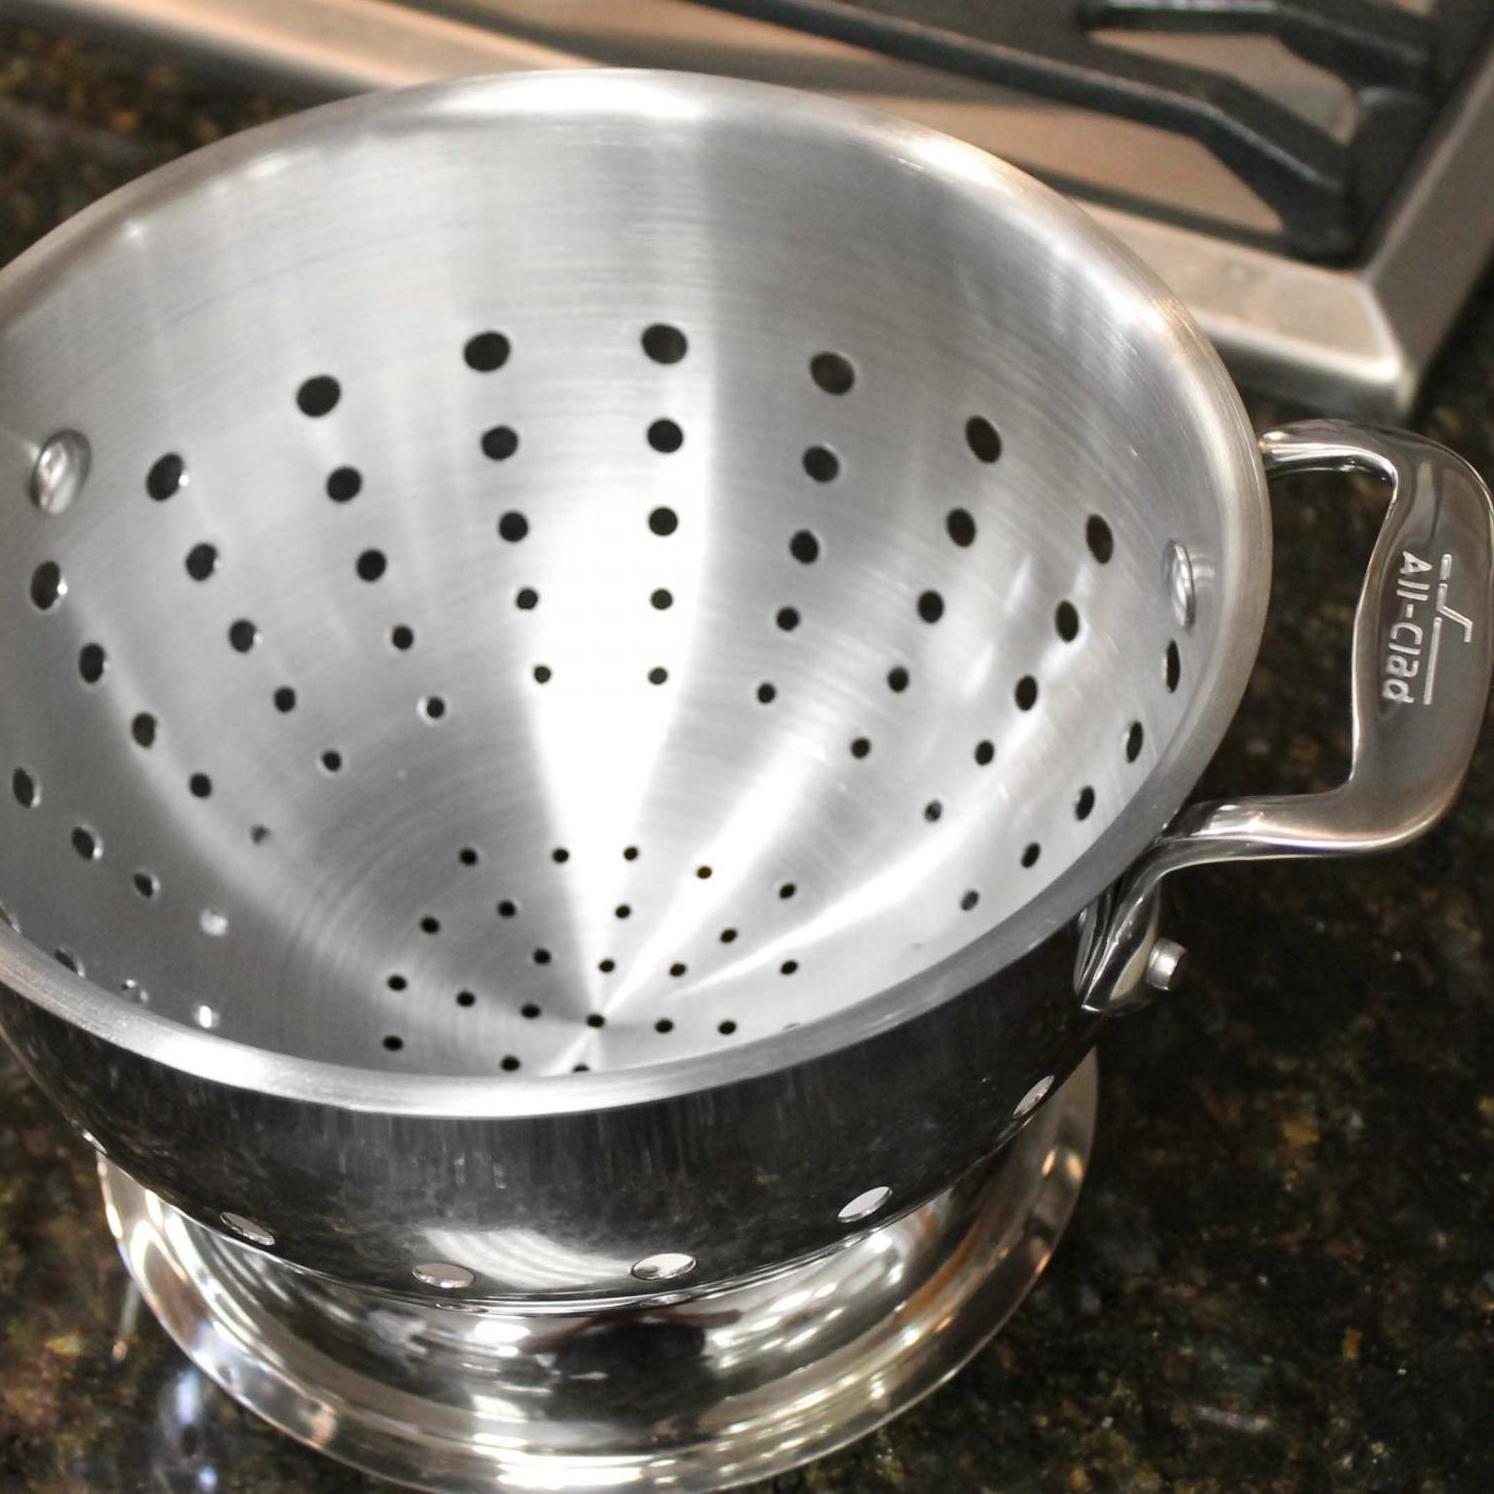

In [51]:
c_dict = pd.Series(
    concepts_info['ids_things'].values, index=concepts_info['synsets']
).to_dict()

for idx, row in test[:10].iterrows():
    i_path = image_path / c_dict[row['synset']] / f'{row["image"]}.jpg'
    display(Image(i_path, width=300))

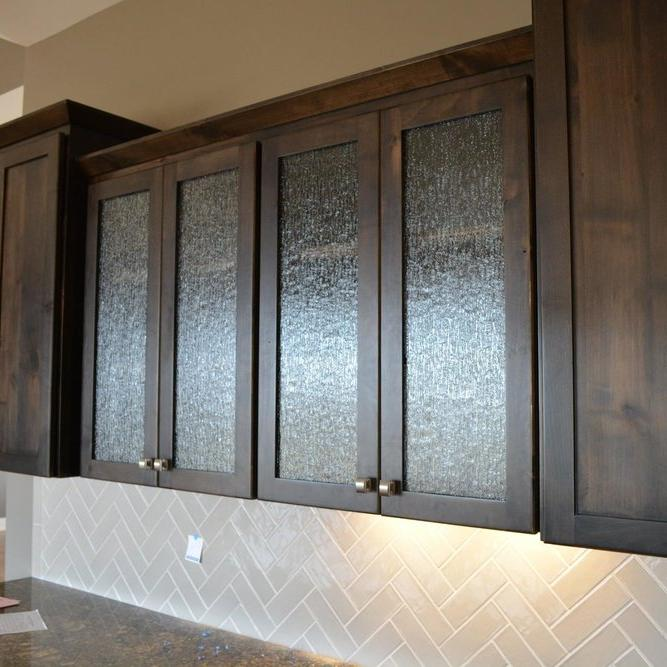

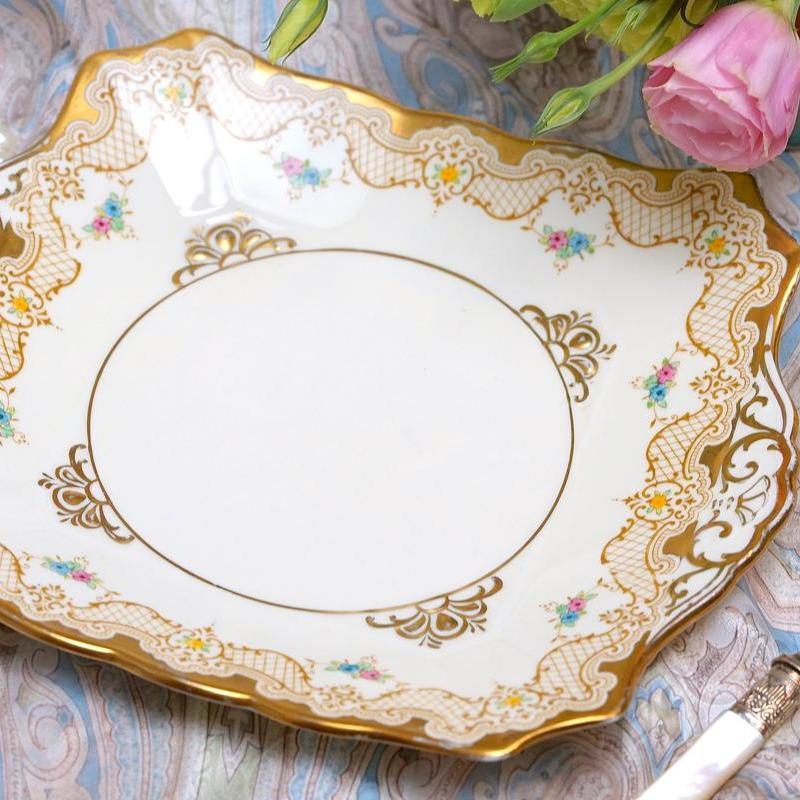

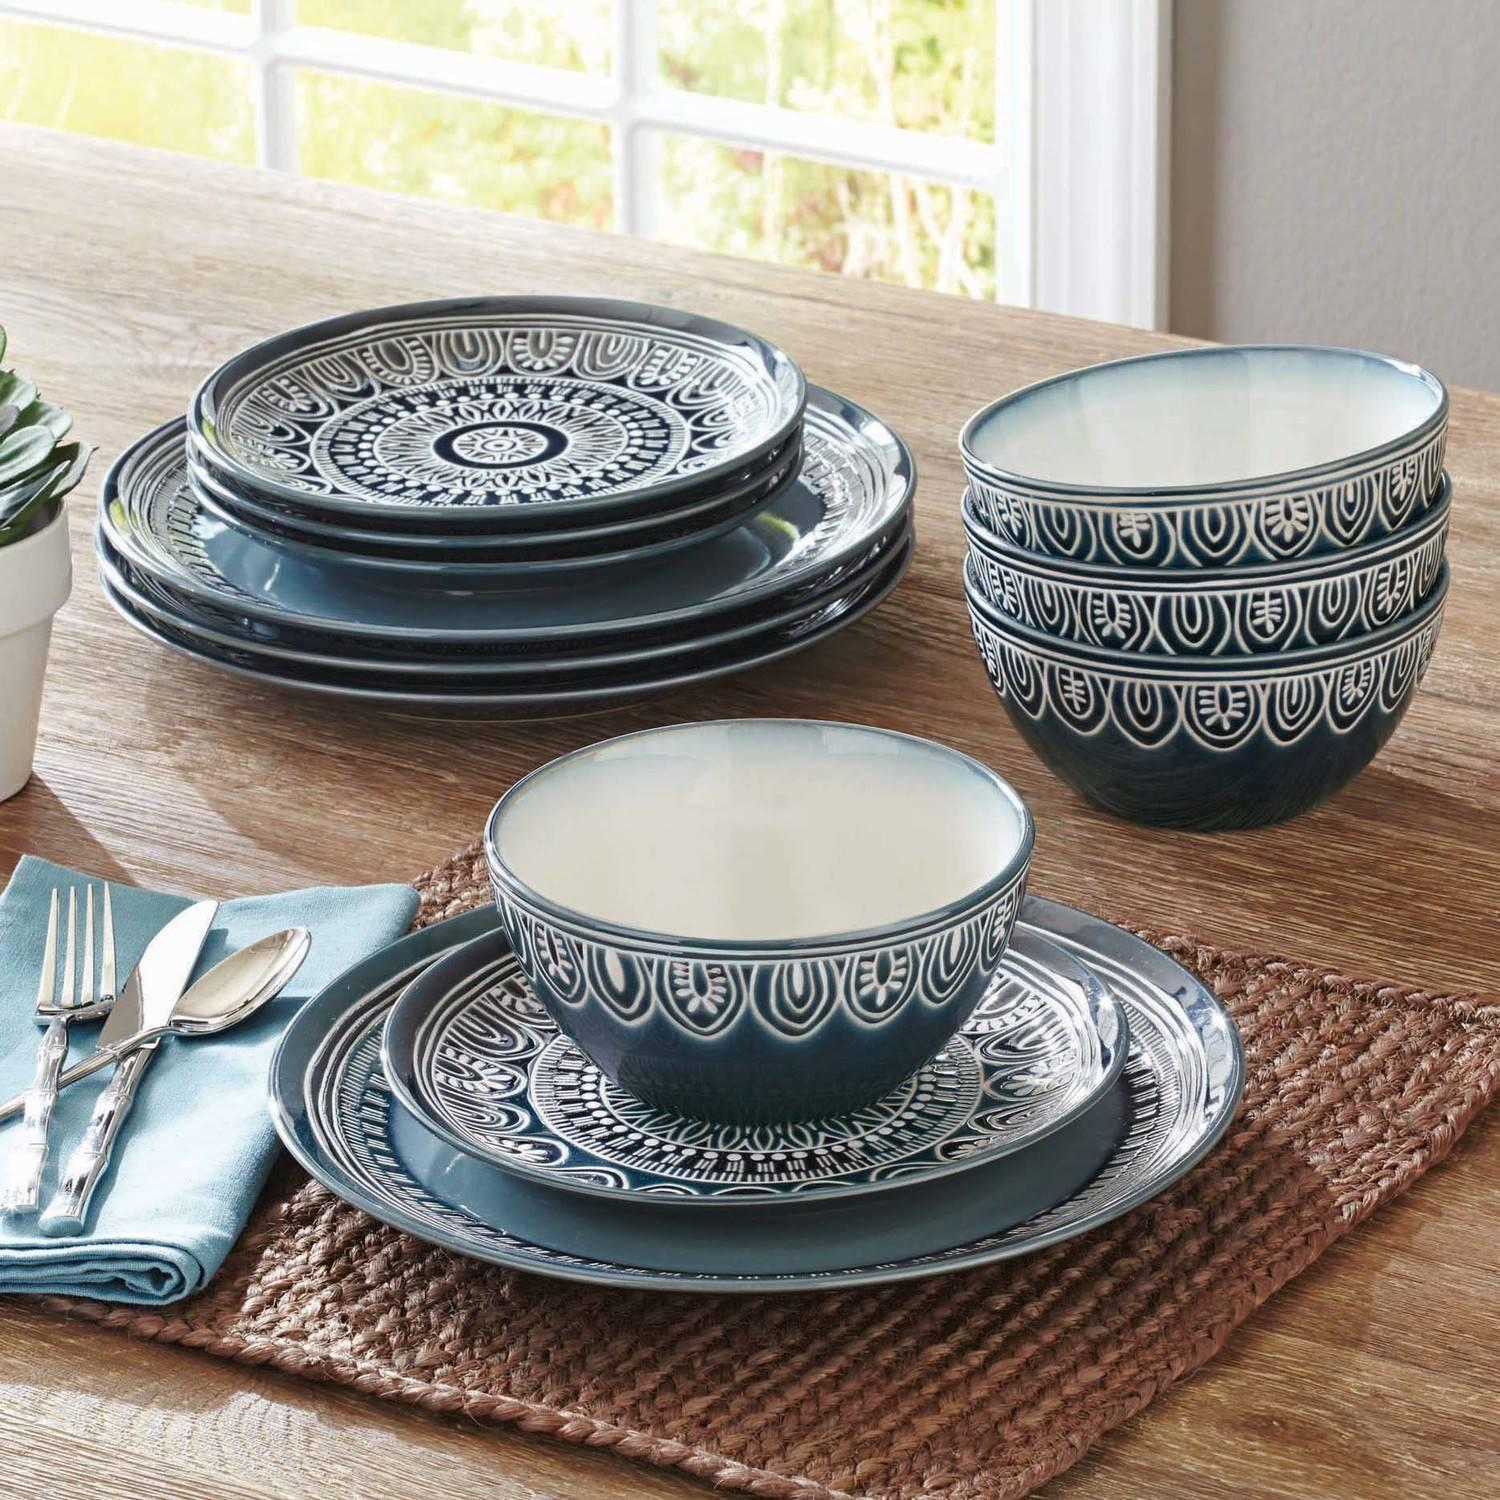

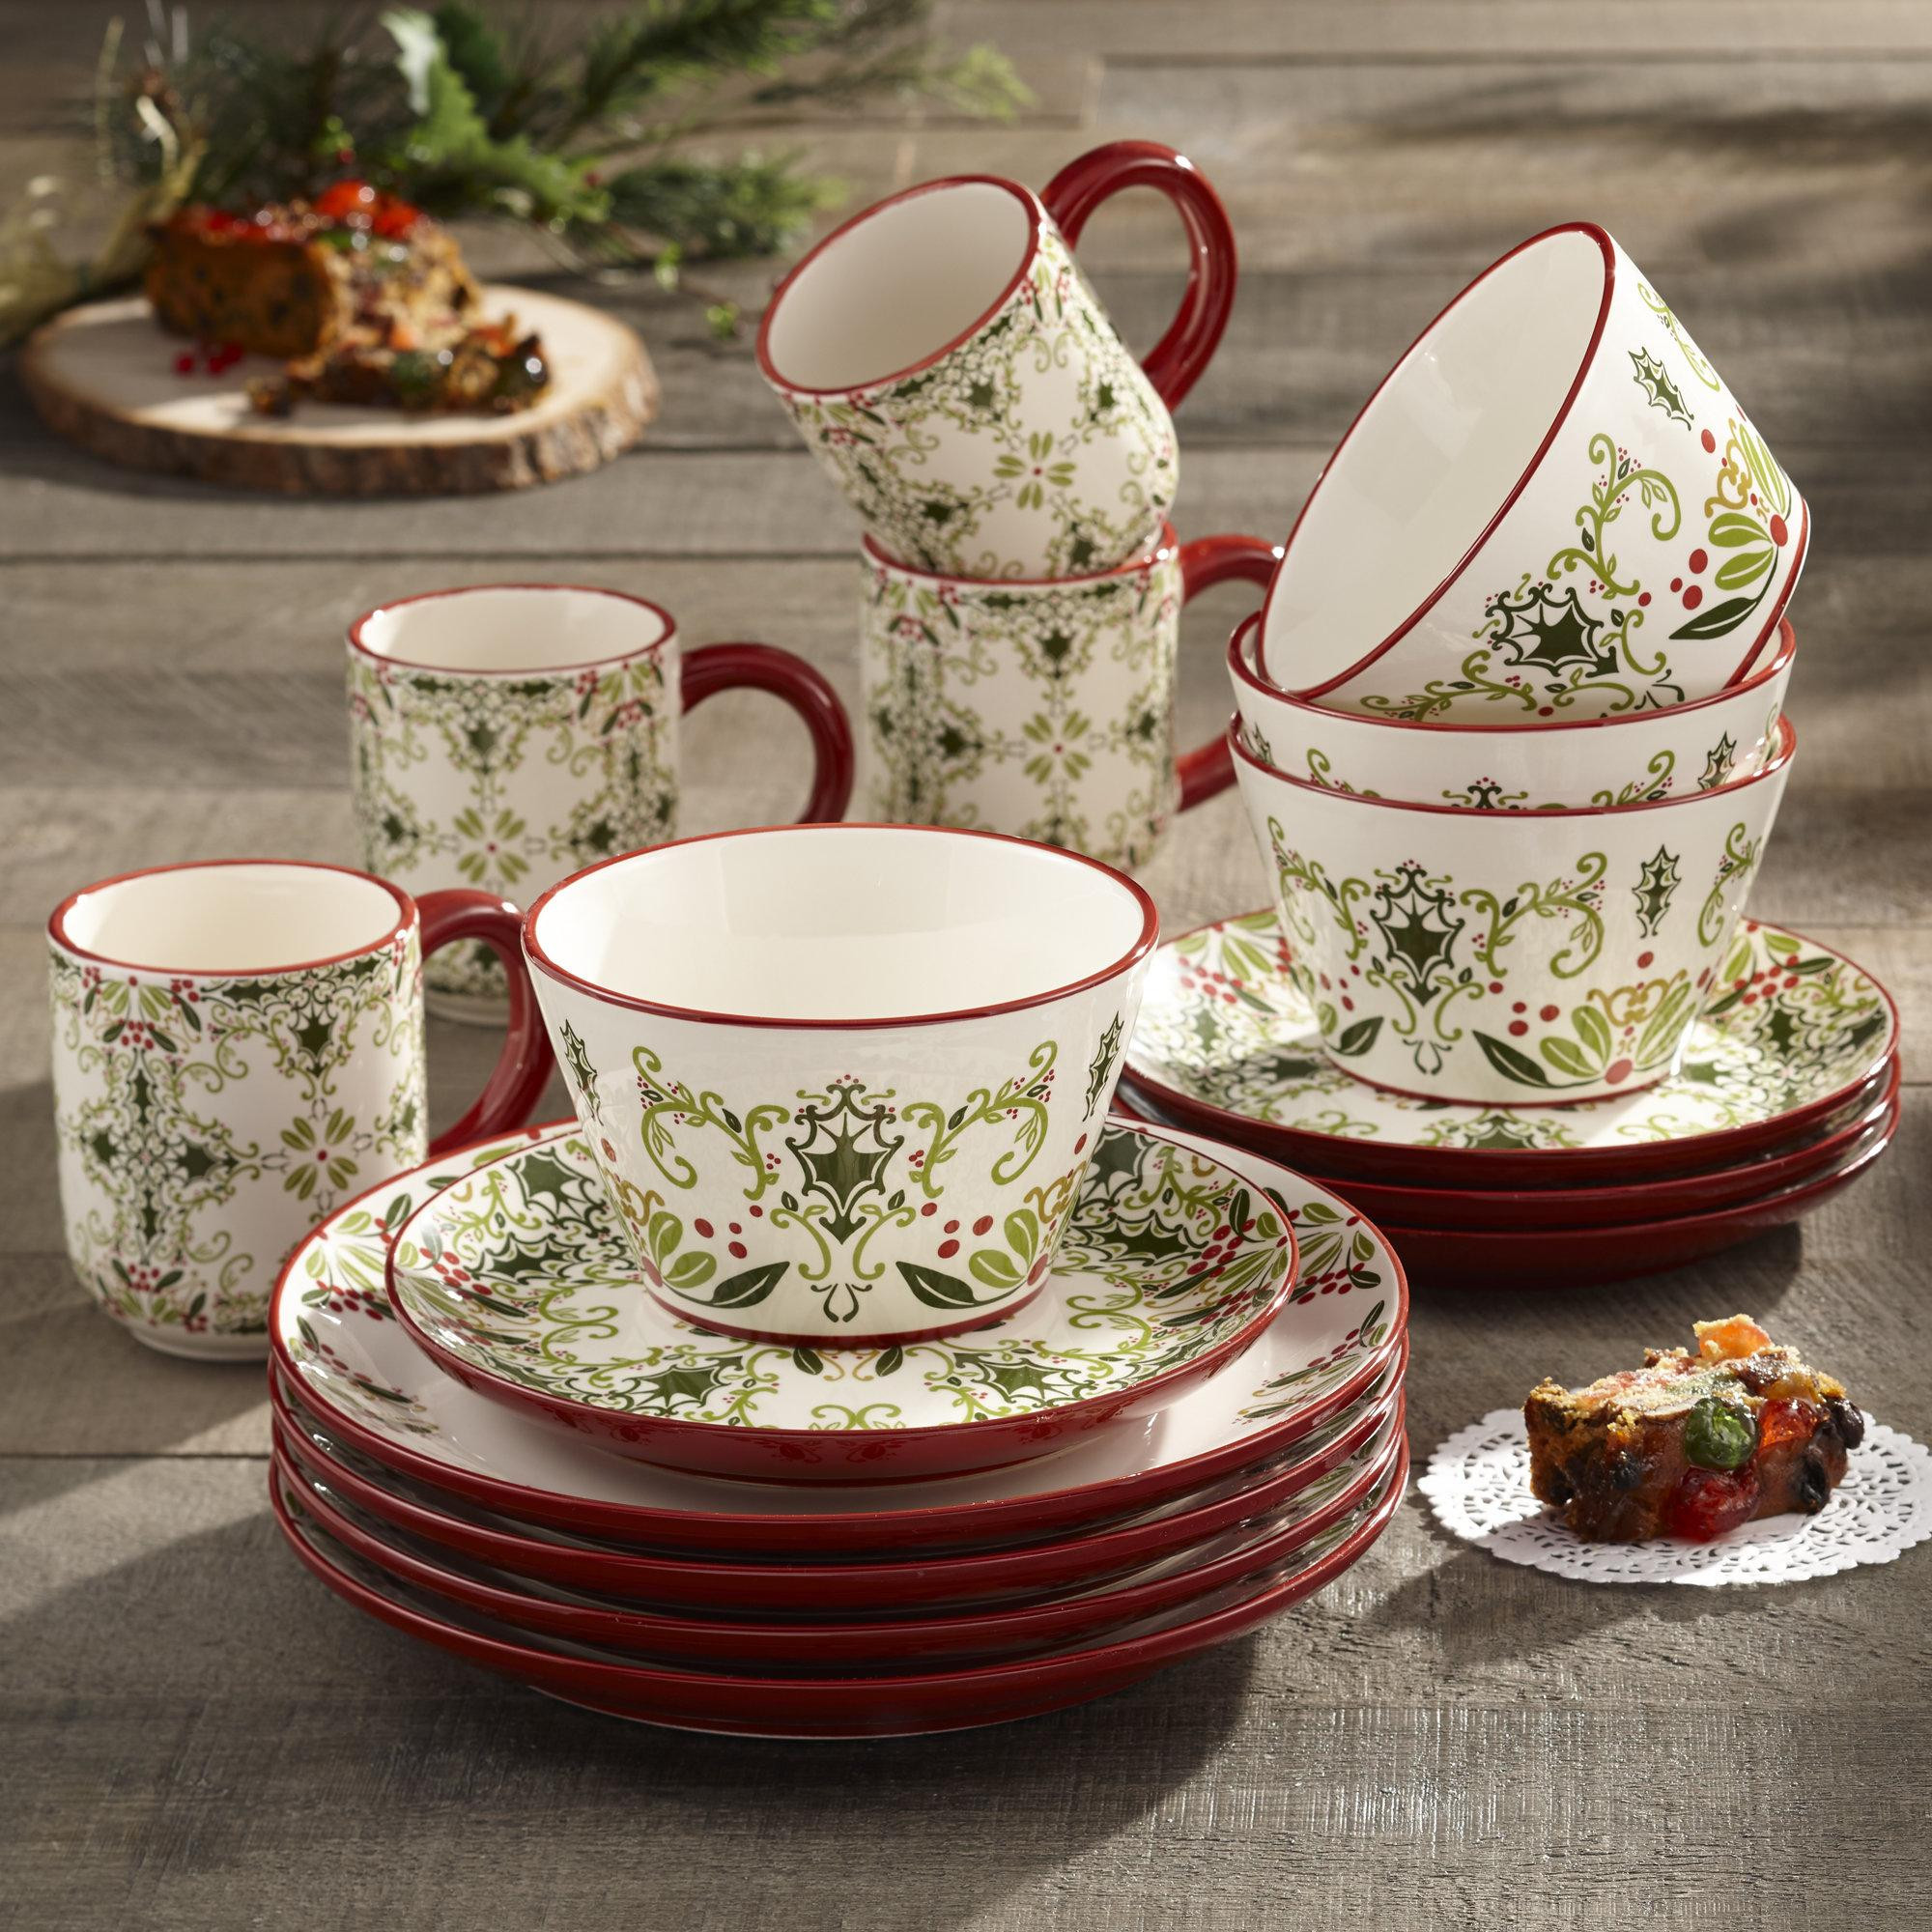

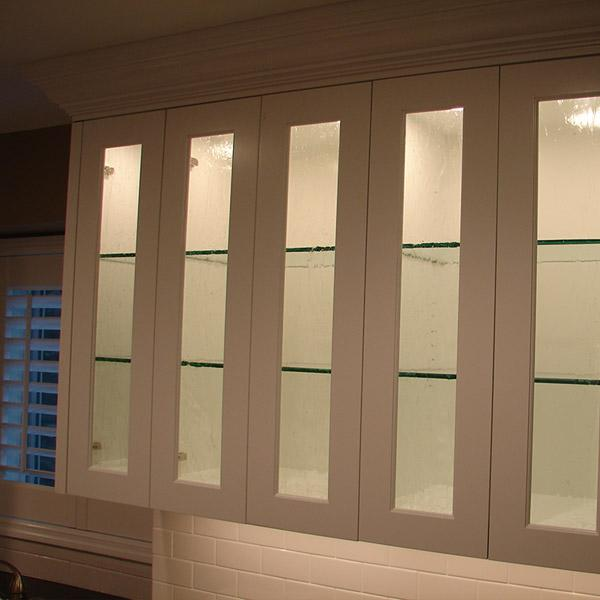

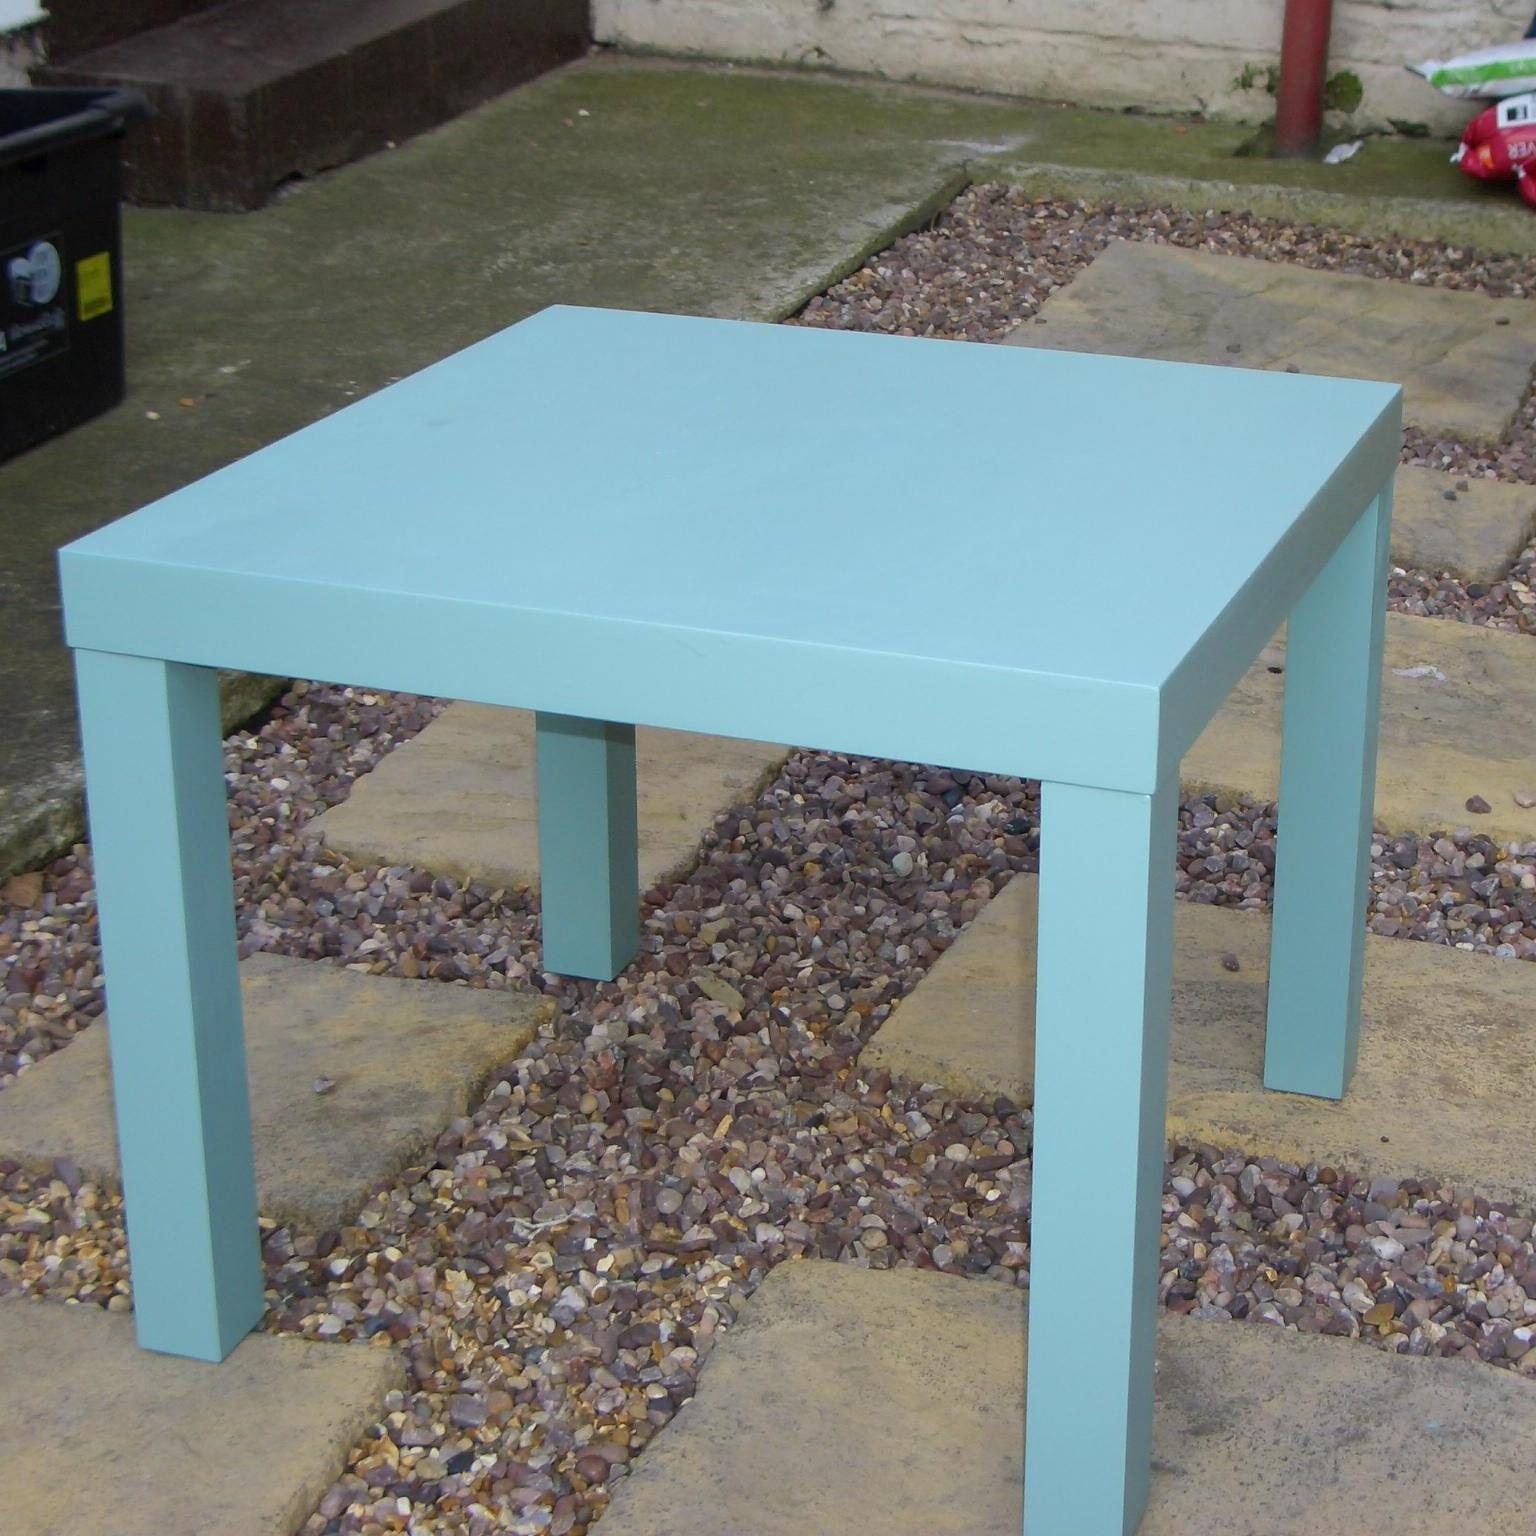

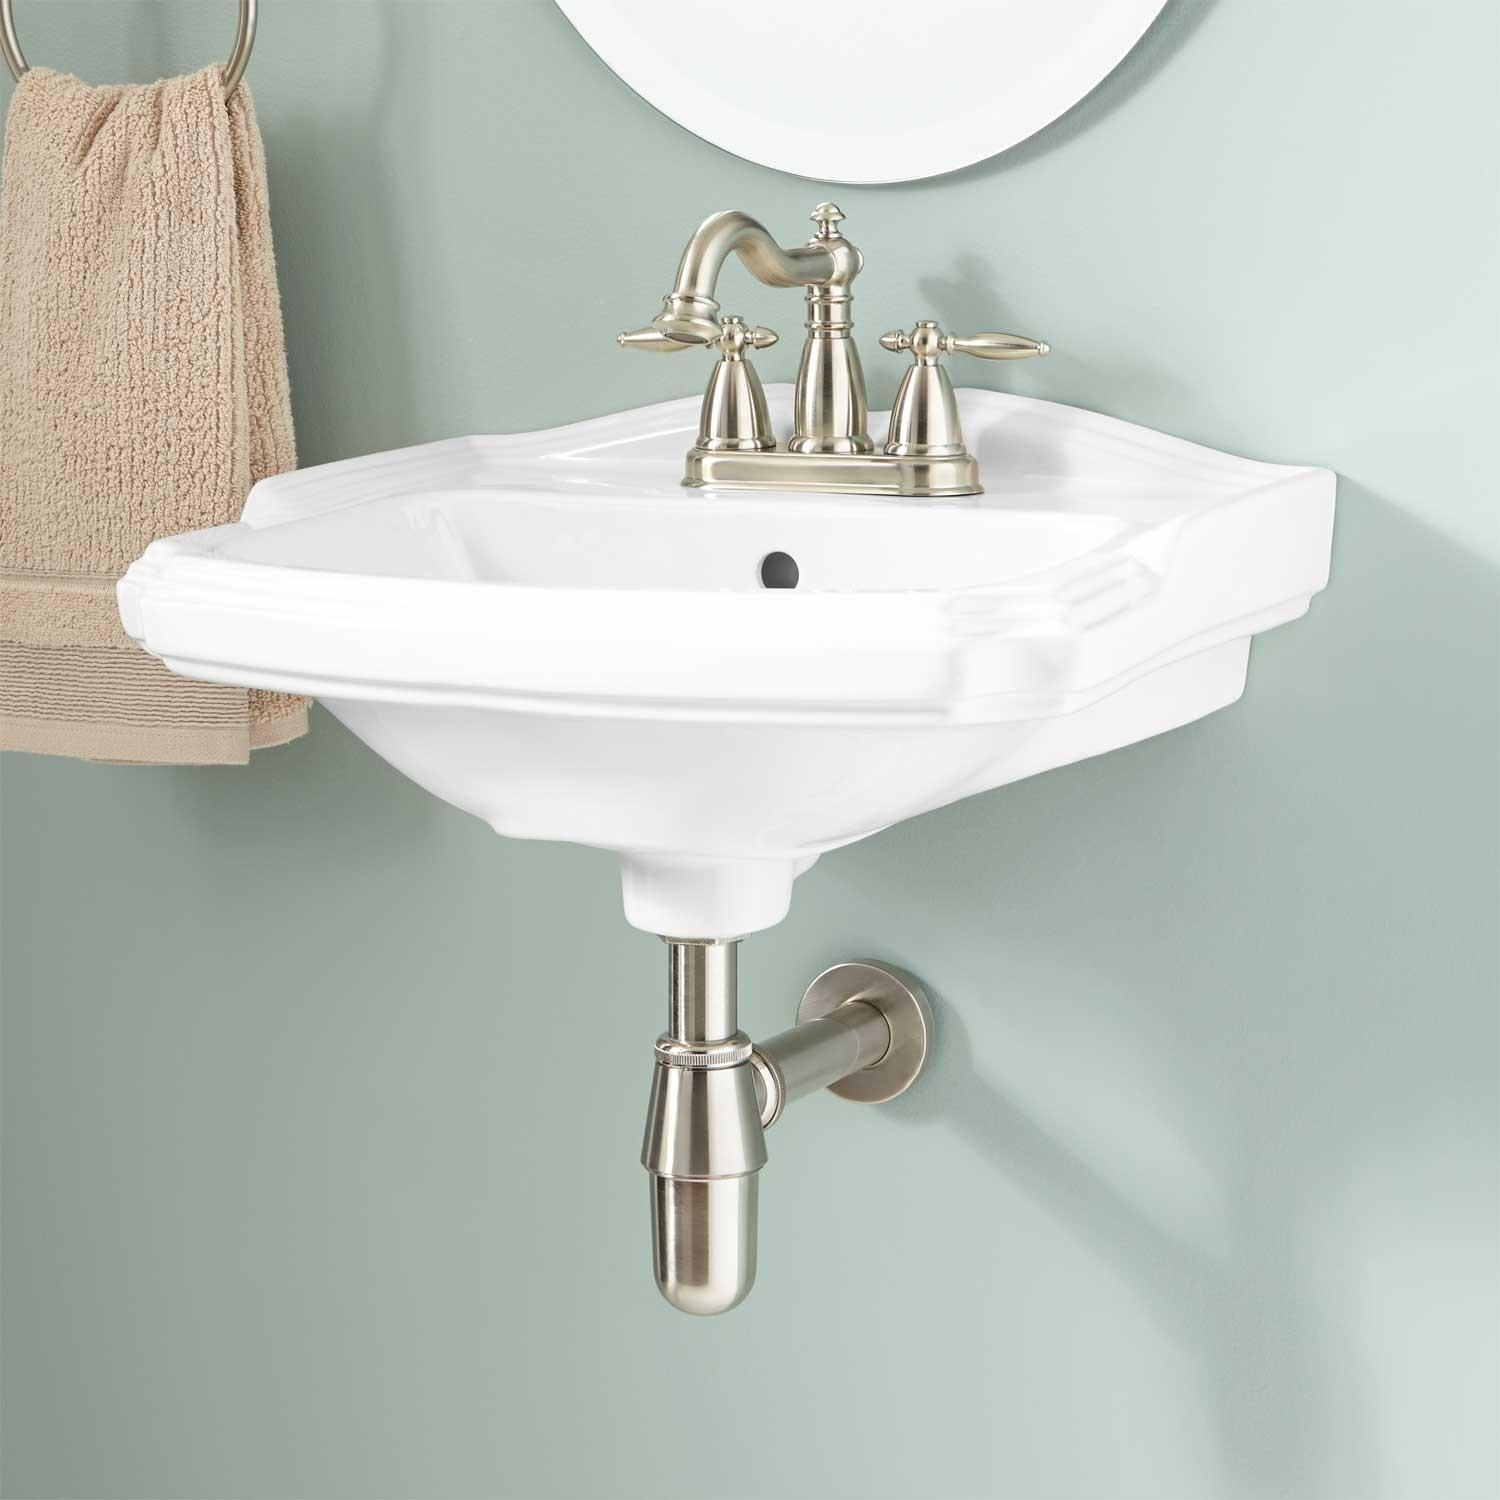

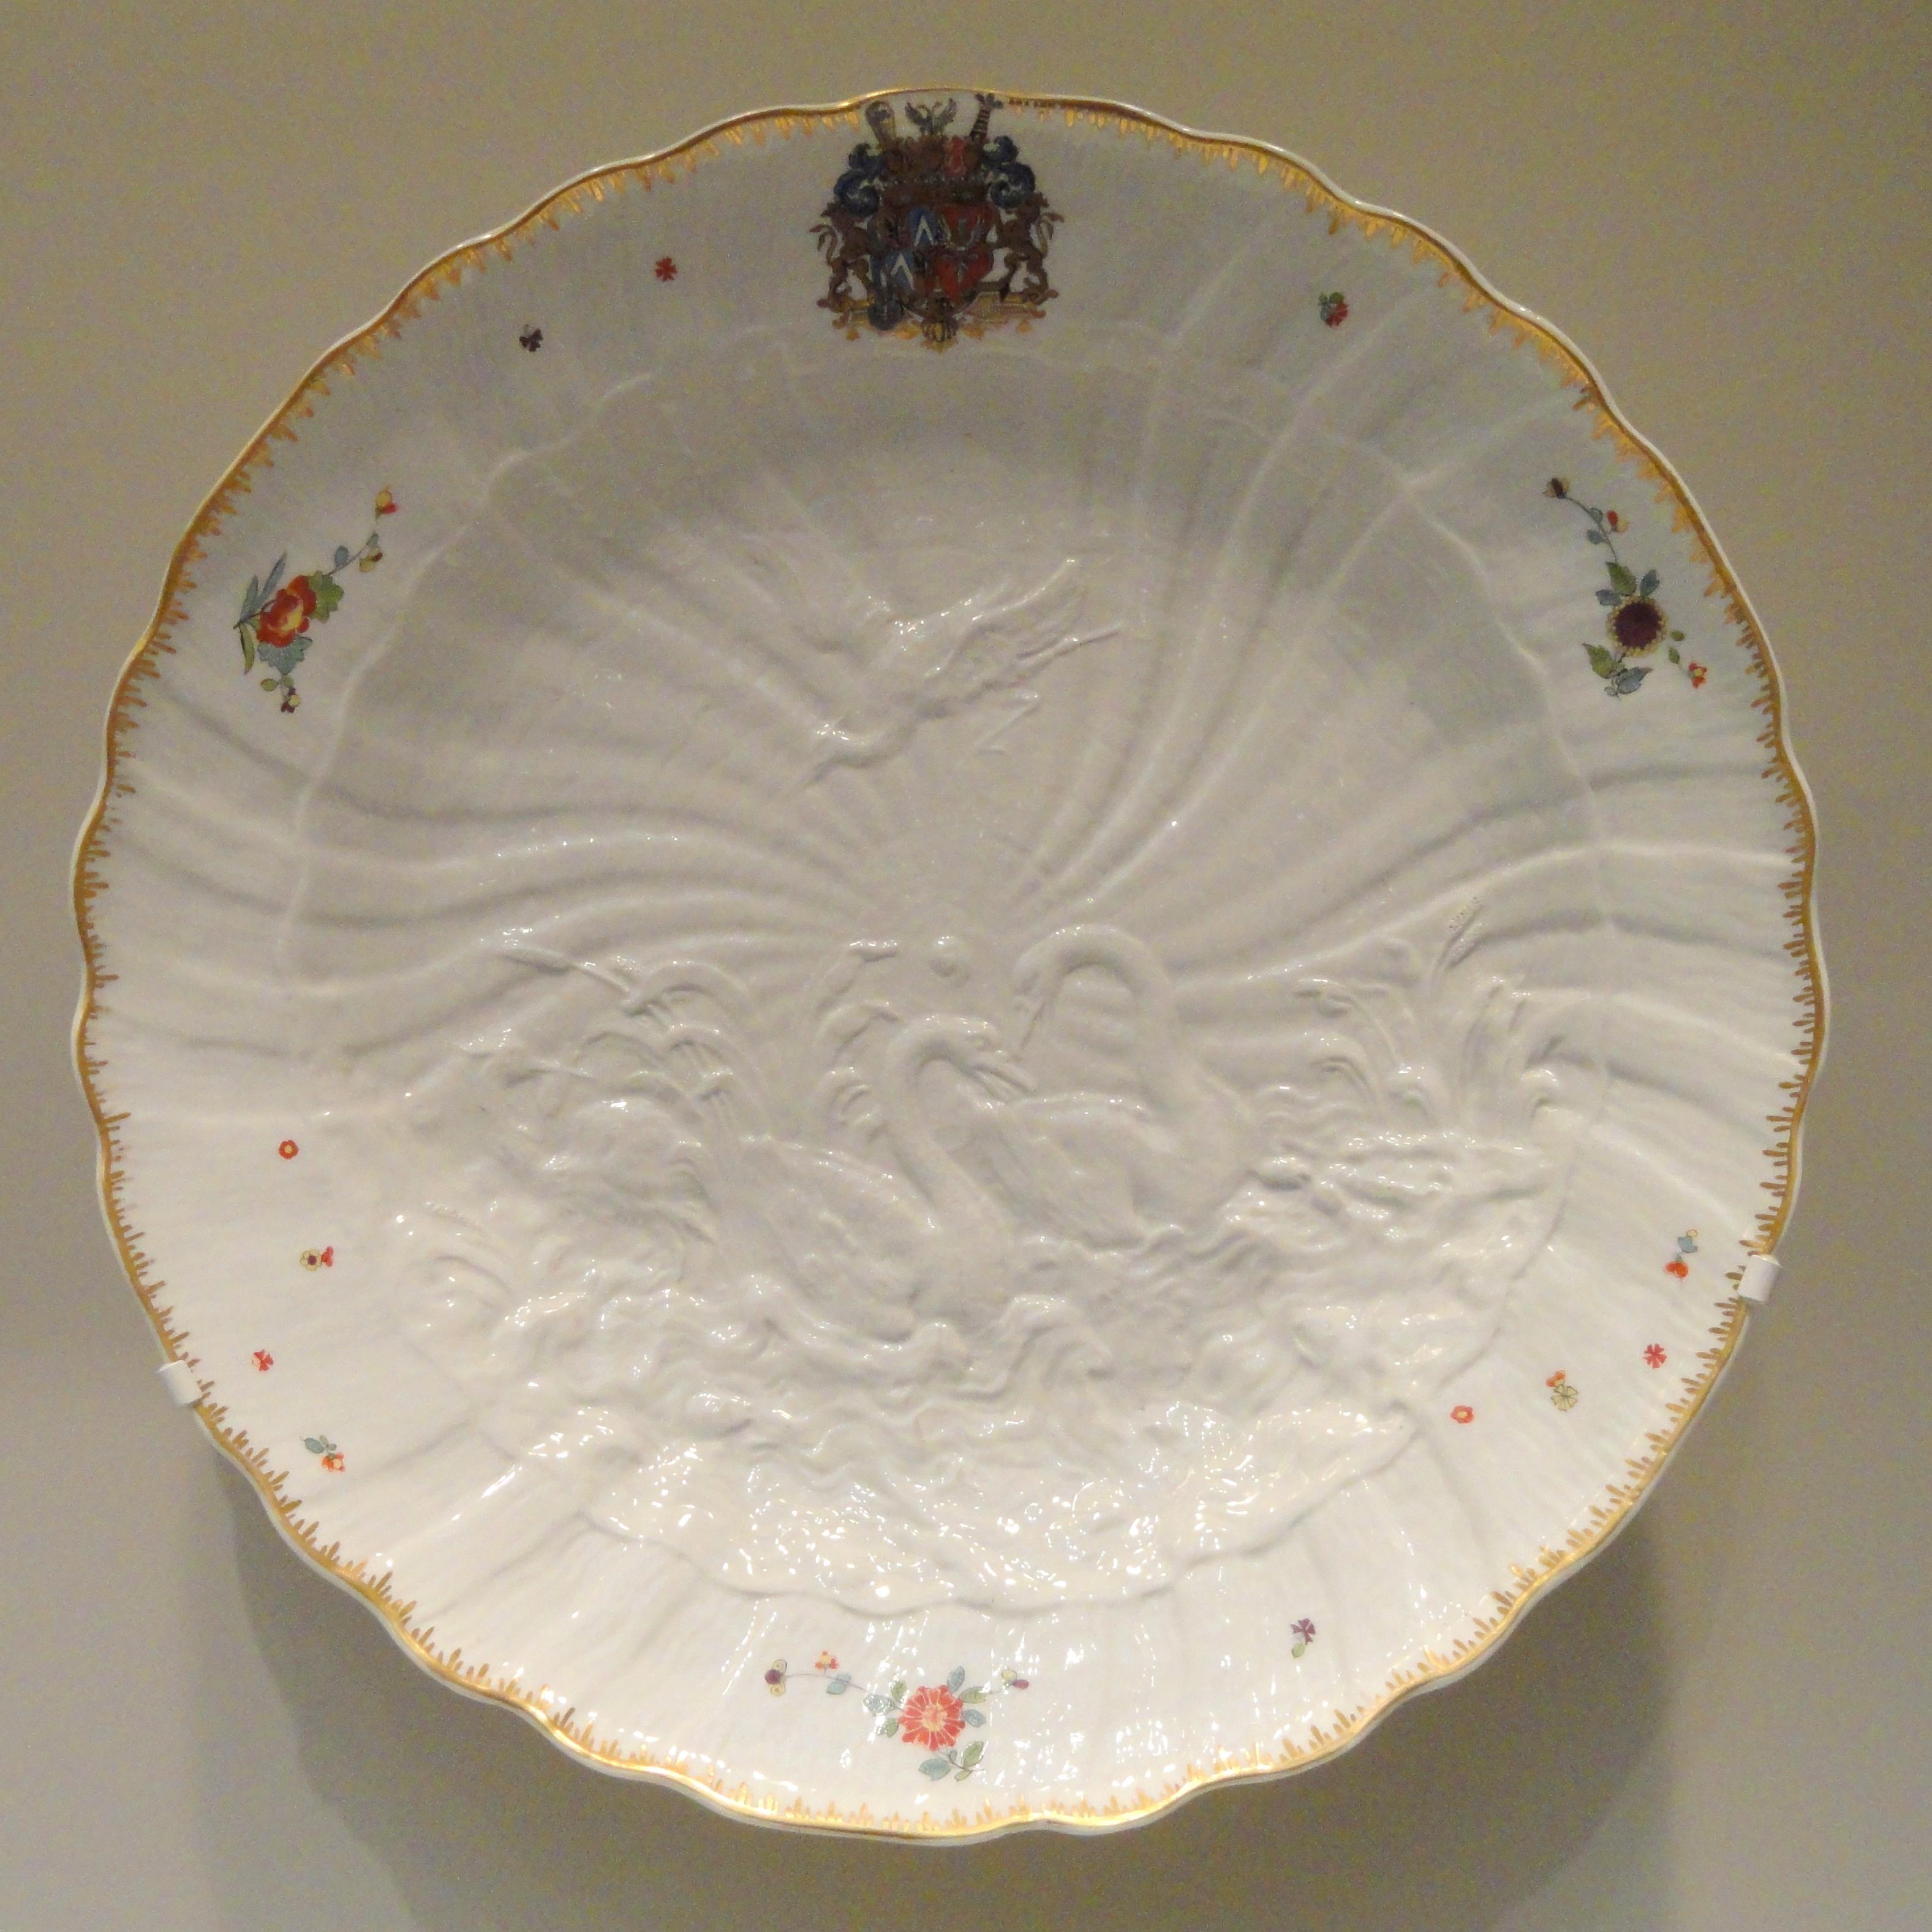

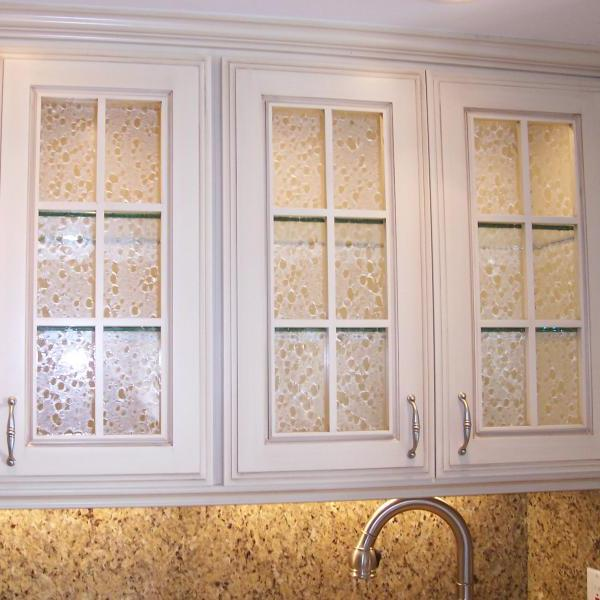

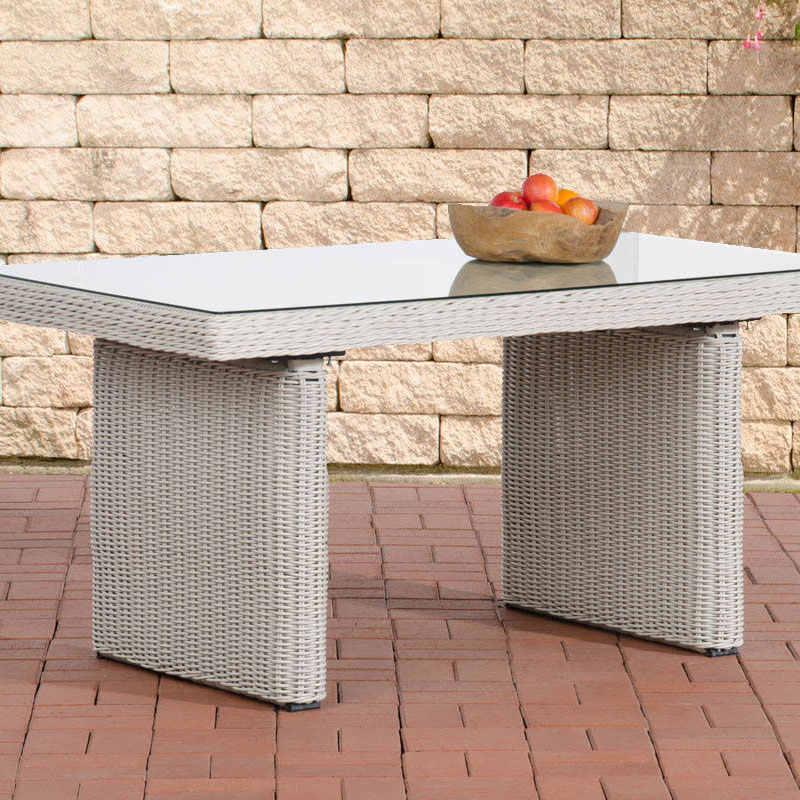

In [52]:
c_dict = pd.Series(
    concepts_info['ids_things'].values, index=concepts_info['synsets']
).to_dict()

for idx, row in test[-10:].iterrows():
    i_path = image_path / c_dict[row['synset']] / f'{row["image"]}.jpg'
    display(Image(i_path, width=300))

__Observations__:
- Possible different invariances learned between models:
    - Differences in the visual patterns
    - Differences in concept-reliance

# Relationship between concept and feature prediction

### Concept detection via feature-prediction
__Q:__ Can we predict the true concept in the image from the feature predictions?

In [19]:
cd_preds = {}
for met in metrics:
    if 'standard' in met:
        sem_ft = StandardScaler().fit_transform(mcrae_ft.values)
    for m in models:
        acc = 0
        f_match_path = project_path / 'results' / m / 'feature_match'
        syns = []
        imgs = []
        preds = []
        for s, s_imgs in s_ids.items():
            for img in s_imgs:
                i_pred = torch.load(f_match_path / f'{img}.pt', map_location=torch.device('cpu'))
                preds.append(i_pred.unsqueeze(dim=0).detach().numpy())
                syns.append(s)
                imgs.append(img)
        preds = np.squeeze(np.array(preds))

        # Standard Scaler
        if 'standard' in met:
            preds = StandardScaler().fit_transform(preds)
        # Cosine
        if 'cosine' in met:
            dist = cdist(preds, sem_ft, 'cosine')
        # Pearson
        elif 'pearson' in met:
            dist = cdist(preds, sem_ft, 'correlation')

        top_preds = []
        for i in range(len(dist)):
            top_indices = np.argsort(dist[i])[:10]
            concept_preds = [synsets[i] for i in top_indices]
            if syns[i] in concept_preds:
                acc += 1 
            top_preds.append(concept_preds)

        m_preds = pd.DataFrame({'synset':syns, 'image':imgs, 'top_preds':top_preds})
        m_preds.to_csv(res_path / 'pred_inspection' / f'{m}_{met}_concept_detection.csv')
        cd_preds[m] = m_preds
        
        print(f'Top 10 accuracy of {m} with {met}: {np.round(acc / len(top_preds), 3)}')
            

Top 10 accuracy of clip with standard_pearson: 0.386
Top 10 accuracy of albef with standard_pearson: 0.371
Top 10 accuracy of vilt with standard_pearson: 0.301


__Observation:__ Not far from real concept detection values!

__Observation:__ _Standarized Pearson_ gave best results.

- _Results with Cosine Distance_
    - CLIP: 0.081
    - ALBEF: 0.35
    - ViLT: 0.16
- _Results with Standarized Cosine Distance_
    - CLIP: 0.36
    - ALBEF: 0.37
    - ViLT: 0.29
- _Results with Pearson Distance_
    - CLIP: 0.38
    - ALBEF: 0.36
    - ViLT: 0.28

### TO-DO
- Do this feature-wise
- Can we say something about the other concepts being predicted?

### Correlation between concept and feature prediction
- Test if correlation is higher for related concept-feature pairs

In [20]:
cpreds = {}
fpreds = {}
for m in models:
    m_cpreds = []
    m_fpreds = []
    for s, s_imgs in s_ids.items():
        for img in s_imgs:
            m_cpreds.append(torch.load(
                res_path / m / 'concept_match'/ f'{img}.pt', map_location=torch.device('cpu')
            ))
            m_fpreds.append(torch.load(
                res_path / m / 'feature_match'/ f'{img}.pt', map_location=torch.device('cpu')
            ))
    cpreds[m] = torch.stack(m_cpreds).detach().numpy().T
    fpreds[m] = torch.stack(m_fpreds).detach().numpy().T

In [21]:
corrs = {}
for m in models:
    m_corrs = []
    for idx, row in c_preds[m].iterrows():
        synset = row['synset']
        cp = cpreds[m][synsets.index(row['synset'])]
        s_info = fsk.loc[fsk['synsets']==synset]
        for _, f_row in s_info.iterrows():
            fp = fpreds[m][f_row['features_idx']]
            dist = cdist(cp.reshape(1,-1), fp.reshape(1,-1), 'correlation')
            m_corrs.append([synset, f_row['features'], f_row['features_type'], 1 - dist[0][0]])
    corrs[m] = pd.DataFrame(m_corrs, columns =['synset', 'feature', 'feature_type', 'corr'])

clip
Ttest_relResult(statistic=87.19964830910432, pvalue=0.0)


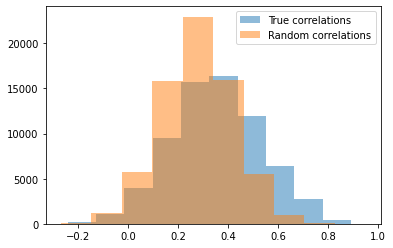

albef
Ttest_relResult(statistic=100.3789752578675, pvalue=0.0)


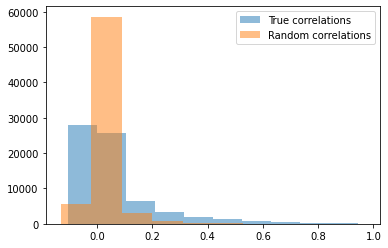

vilt
Ttest_relResult(statistic=96.7519385186316, pvalue=0.0)


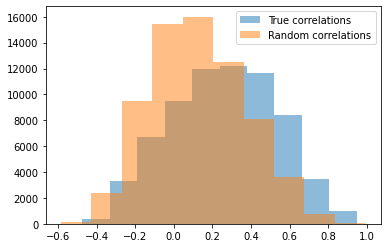

In [22]:
for m in models:
    true_corrs = corrs[m]['corr'].to_numpy()
    random_corrs = []
    for _ in range(len(corrs[m])):
        cp = cpreds[m][np.random.randint(low=0, high=len(cpreds[m]))]
        fp = fpreds[m][np.random.randint(low=0, high=len(fpreds[m]))]
        dist = cdist(cp.reshape(1,-1), fp.reshape(1,-1), 'correlation')
        random_corrs.append(1 - dist[0][0])
    random_corrs = np.array(random_corrs)

    print(m)
    print(ttest_rel(true_corrs, random_corrs))
    
    plt.hist(true_corrs, alpha=0.5, label='True correlations')
    plt.hist(random_corrs, alpha=0.5, label='Random correlations')
    plt.legend(loc='upper right')
    plt.show()

#### To-Do
- Compute mutual information instead of linear correlation
  - Probability of feature detected if concept is found? and viceversa

In [57]:
cpreds['albef'].shape

(342, 4928)

In [63]:
np.round(cpreds['albef'][:, 1], 3)

array([0.999, 0.   , 0.   , 0.   , 0.001, 0.   , 0.001, 0.   , 0.   ,
       0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.002, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   , 0.006,
       0.025, 0.001, 0.002, 0.003, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.001, 0.002,
       0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.001, 0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.003, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.   ,
       0.002, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.003, 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.001, 0.   , 0.001, 0.005, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.003, 0.   ,

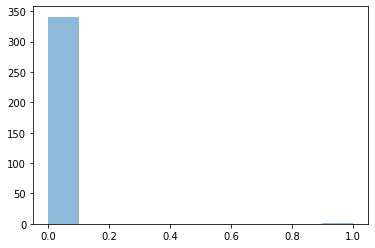

In [61]:
plt.hist(cpreds['albef'][:, 8], alpha=0.5, label='ALBEF preds')
plt.show()

# Open Questions

#### Characterize in depth WHAT features are learned for each type of network
- Characterize the dependency between detected feature and concept
    - Maybe some features are only detected for some concepts, and vice-versa
- Only observable features? (we need VG dataset)
- Dependence on word in feature description?

#### Characterize HOW these feature invariances are represented
- Detection of visual patterns related to non-observable features
  - Methods?
- Characterize the RELATIONSHIP between the feature invariances and concepts
  - (Specially important for non-observable features --> does the network recognize a concept and activates its corresponding features, or are features separately learned?)
  - Does the detection of concepts precedes the detection of features? Of viceversa?
      - Linear decoding?
      - Constrain analysis to detected features and concepts
  - Determine "causality" with ablation studies?
  - Examine transformations between selective neurons for concepts and selective neurons for features
      - E.g. are feature neurons an addition of concept neurons? A subselection? A type of linear transformation?
  - Are the internal representations of a feature the same across concepts?
  - Exploration of how the representational spaces change if both concepts are features are added to prompt.
      - Maybe this is dependent on features and concepts being recognized in the single case
  - (All these effects might only work for some concepts/features)

# Scratch space

In [23]:
# y = fpreds['clip'][0]
# X = []
# for idx, row in c_preds['clip'].iterrows():
#     net_ft = torch.load(
#         (res_path / 'clip' / 'net_ft' / f'hs_img_{row["image"]}.pt'),
#         map_location=torch.device('cpu')
#     )
#     X.append(net_ft[-1, 0, 0, :])
# X = torch.stack(X).detach().numpy()

In [24]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVR

y = fpreds['clip'][0]
X = []
for idx, row in c_preds['clip'].iterrows():
    net_ft = torch.load(
        (res_path / 'clip' / 'net_ft' / f'hs_img_{row["image"]}.pt'),
        map_location=torch.device('cpu')
    )
    X.append(net_ft[-1, 0, 0, :])
X = torch.stack(X).detach().numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y)

svr = SVR()
X_train = StandardScaler().fit_transform(X_train)

reg = make_pipeline(StandardScaler(), mutual_info_regression())

reg.fit(X_train, y_train)
#mean_absolute_error(reg.predict(X_test), y_test)
#r2_score(reg.predict(X_test), y_test)

NameError: name 'make_pipeline' is not defined

In [ ]:
test = mutual_info_regression(X, y)

In [ ]:
plt.hist(test, alpha=0.5)
plt.show()

In [ ]:
plt.hist(reg.predict(X_test) - y_test, alpha=0.5)
plt.show()

In [ ]:
plt.hist(StandardScaler().fit_transform(y_train.reshape(-1,1)), alpha=0.5)
plt.show()

In [ ]:
plt.hist(StandardScaler().fit_transform(y.reshape(-1,1)), alpha=0.5)
plt.show()

### TO-DO:
- Repeat analysis with abstract words
- Repeat analysis with subselection of words that are doing something vs not